In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Configure data path
DATA_PATH = "/content/drive/My Drive/CS230 Stock Project/data"

ImportError: No module named google.colab

# **Data Loading**

In [0]:
import os
import pandas as pd
import time

# Check if directory exist
# Path = 'D:\XDM Download\Compressed\ReutersNews106521\ReutersNews106521'
path="D:\XDM Download\Compressed\bloombergnews"
print(os.path.isdir(path))

# Helper function traverse directory contains news 
# Returns a interator 
def scanRec(baseDir):
    for entry in os.scandir(baseDir):
        if entry.is_file():
            yield entry.path
        elif entry.is_dir():
            yield from scanRec(entry.path)


# Store all file path in a list
files_path = []
for file_path in scanRec(path):
    files_path.append(file_path)


newsDF = pd.DataFrame(columns = ['title','time','content'])
# File operation
for file_path in files_path:
    # Tempt to read files line by line
    try:
        with open(file_path) as f:
            lines = [line.rstrip() for line in f]
        # Get the title of news
        newsTitle = lines[0][3:] 
        # Format time of the news
        dateTime = lines[2][3:]
        newsTime = time.strptime(dateTime[:-4], '%a %b %d, %Y %I:%M%p')
        # Dump the rest of the news in contents
        newsContent = lines[3:]
        # Store everything in a news dataframe
        newsDF = newsDF.append({'title' : newsTitle, 'time' : newsTime, 'content' : newsContent}, ignore_index=True)
    except Exception:
        print(file_path)


# **Prepare Data Labels**

In [2]:
# Load stock prices
SP500 = pd.read_csv(DATA_PATH + '/SP500.csv')
SP500.head

NameError: name 'pd' is not defined

In [0]:
# Mark price increase as +1 and price decrease as 0
SP500_daily_return = SP500[['GSPC.Adjusted']].pct_change()
SP500_movement_direction = (SP500_daily_return > 0) * 1
#SP500_movement_direction[SP500_movement_direction == 0] = 0
# Add time information
SP500_movement_direction['time'] = SP500['Unnamed: 0']

In [3]:
SP500_movement_direction

NameError: name 'SP500_movement_direction' is not defined

In [4]:
# Store SP500_movement_direction
SP500_movement_direction.to_pickle(DATA_PATH + "/SP500_movement_direction.pkl")

NameError: name 'SP500_movement_direction' is not defined

# **Open Information Extraction**

In [0]:
# Import libraries
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import time
import string

In [0]:
# Load bloomberg dataset
bloomberg = pd.read_pickle(DATA_PATH + "/bloombergTitleTime.pkl")
# Load reuters dataset
reuters = pd.read_pickle(DATA_PATH + "/ReutersNewsTitleTimeOnly.pkl")

In [0]:
# Prepare Open IE
import stanfordnlp
nlp = stanfordnlp.Pipeline()

from openie import StanfordOpenIE

In [0]:
event_tuples = []

# Process titles from Reuters
with StanfordOpenIE() as client:
    for index, row in reuters.iterrows():
        text = row['title']
        #print(text)
        for triple in client.annotate(text):
            triple['time'] = row['time']
            event_tuples.append(triple)
            #print(triple)
        #print("=======================")

# Process titles from Bloomberg
with StanfordOpenIE() as client:
    for index, row in bloomberg.iterrows():
        text = row['title']
        #print(text)
        for triple in client.annotate(text):
            triple['time'] = row['time']
            event_tuples.append(triple)

In [0]:
# Save event tuples
event_tuples.to_pickle(DATA_PATH + "/event-tuples.pkl")

# **Word2Vec Embeddings**

In [0]:
import numpy as np
import time
#import word2vec
import pickle
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import gensim.downloader as api
info = api.info()
model = api.load("word2vec-google-news-300")

# **BERT Embeddings**

In [ ]:
from bert_serving.client import BertClient
import pandas as pd
import numpy as np

bc = BertClient()
newsTitleDF = pd.read_pickle("/home/ethan/ethanFileServer/google drive/CS230 Stock Project/data/bloombergTitleTime.pkl")
headline_encoding = bc.encode(headlines)
np.save("BERT_heading.npy", headline_encoding, allow_pickle=True)

# **Smooth Inverse Frequency (SIF) Embeddings**

In [0]:
# Convert data to lists of strings
bloomberg_list = bloomberg.title.values.tolist()
reuters_list = reuters.title.values.tolist()

In [0]:
print(len(bloomberg_list))
print(len(reuters_list))

447373
106494


In [0]:
# Concatenate time stamps
time = bloomberg.time.append(reuters.time, ignore_index= True)

In [0]:
pip install -U fse

     |████████████████████████████████| 112kB 3.5MB/s 
     |████████████████████████████████| 24.2MB 1.2MB/s 
     |████████████████████████████████| 32.8MB 124kB/s 
     |████████████████████████████████| 4.0MB 44.0MB/s 
     |████████████████████████████████| 624kB 44.6MB/s 
     |████████████████████████████████| 276kB 53.4MB/s 
  Created wheel for fse: filename=fse-0.1.15-cp36-cp36m-linux_x86_64.whl size=255568 sha256=02effddc27526ec89f5c27f9522b4c18dd8477effa44c70b09e3d43ee1ccbb82
  Stored in directory: /root/.cache/pip/wheels/c9/f9/00/f323d92e0091436ce32f54cb7760b8a229469a184f940c2a4d
  Created wheel for wordfreq: filename=wordfreq-2.2.2-cp36-none-any.whl size=32816665 sha256=7d39e7a2aa6643bfbabd392309898f01f210cc4291692769bfb3aa6006fa3127
  Stored in directory: /root/.cache/pip/wheels/33/2e/fc/e447859743f61cdf41873a5bcc11300c05fbd27631aea984e1
  Created wheel for langcodes: filename=langcodes-1.4.1-cp36-none-any.whl size=4100892 sha256=400ce95dae3a73a5c53c589d3b7002eb625bd1566d

In [0]:
from fse import SplitIndexedList
sentence = SplitIndexedList(bloomberg_list, reuters_list)

In [0]:
# Import FAST_VERSION to ensure compilation of cython routins work correctly
from fse.models.average import FAST_VERSION, MAX_WORDS_IN_BATCH
print(MAX_WORDS_IN_BATCH)
print(FAST_VERSION)

10000
1


In [0]:
# Import SIF and a pre-trained word embedding model
from fse.models import SIF
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [0]:
# Create SIF model
sif = SIF(model)

In [0]:
# Train SIF model on data
sif.train(sentence)

(553867, 4222689)

In [0]:
sif_embedding = list()

In [0]:
for i in range(len(time)):
  sif_embedding.append(sif.sv.get_vector(i))

In [0]:
sif_embedding = pd.Series(sif_embedding)

In [0]:
sif_result = {"SIF_embedding": sif_embedding, "Time": time}
sif_result = pd.DataFrame(sif_result)

In [0]:
# Store result of SIF embeddings
sif_result.to_pickle(DATA_PATH + "/sif.pkl")

# **Universal Sentence Encoder Embeddings**

In [0]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [0]:
logging.set_verbosity(tf.logging.ERROR)

In [0]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    bloomberg_embeddings = session.run(embed(bloomberg_list))
    reuters_embeddings = session.run(embed(reuters_list))

In [0]:
use_embeddings = np.vstack((bloomberg_embeddings, reuters_embeddings))

In [0]:
use_list = []
for i in range(use_embeddings.shape[0]):
  use_list.append(use_embeddings[i])

In [0]:
use_list_series = pd.Series(use_list)
use_result = {"USE_embedding": use_list_series, "Time": time}
use_result = pd.DataFrame(use_result)

In [0]:
use_result

,USE_embedding,Time
0,"[0.015777053, -0.03613988, 0.046614792, -0.052...","(2007, 11, 29, 21, 38, 7, 3, 333, -1)"
1,"[0.048788056, -0.06268013, -0.03979131, 0.0017...","(2007, 11, 29, 8, 15, 2, 3, 333, -1)"
2,"[0.053301297, -0.0064970586, -0.03770192, -0.0...","(2007, 11, 29, 21, 16, 34, 3, 333, -1)"
3,"[0.033276, -0.09180895, -0.0041335635, 0.00887...","(2007, 11, 29, 22, 35, 53, 3, 333, -1)"
4,"[-0.029104069, 0.034960084, -0.060233478, 0.00...","(2012, 12, 21, 9, 9, 29, 4, 356, -1)"
...,...,...
553862,"[0.00028035423, -0.0808258, 0.008425885, 0.019...","(2013, 11, 19, 22, 49, 0, 1, 323, -1)"
553863,"[0.00803918, -0.04394041, -0.053863462, 0.0312...","(2013, 11, 19, 20, 13, 0, 1, 323, -1)"
553864,"[0.070839085, -0.071056604, 0.05933676, -0.028...","(2013, 11, 19, 20, 6, 0, 1, 323, -1)"
553865,"[0.019076766, -0.0960133, 0.03736691, 0.019570...","(2013, 11, 19, 20, 8, 0, 1, 323, -1)"


In [0]:
# Store result of USE embeddings
use_result.to_pickle(DATA_PATH + "/use.pkl")

# **Visualization of Word2Vec Embedding**

In [0]:
df = pd.read_pickle(DATA_PATH + "/wordEmbedingVecDF.pkl")

In [0]:
embeddingDF = df

In [0]:
df

,object,relation,subject,time
0,"[0.0205078125, -0.3408203125, -0.291748046875,...","[-0.04052734375, 0.0361328125, -0.07421875, 0....","[0.07861328125, 0.09814453125, 0.1689453125, 0...","(2006, 10, 20, 18, 15, 0, 4, 293, -1)"
1,"[0.271484375, 0.25390625, 0.05712890625, -0.02...","[0.060546875, -0.012939453125, -0.10888671875,...","[-0.05322265625, 0.1923828125, -0.28515625, 0....","(2006, 10, 22, 12, 14, 0, 6, 295, -1)"
2,"[0.30712890625, 0.313232421875, -0.21435546875...","[0.060546875, -0.012939453125, -0.10888671875,...","[-0.05322265625, 0.1923828125, -0.28515625, 0....","(2006, 10, 22, 12, 14, 0, 6, 295, -1)"
3,"[-0.26708984375, 0.0401611328125, 0.1710205078...","[0.095703125, 0.11279296875, -0.10498046875, 0...","[-0.306640625, -0.10791015625, 0.054443359375,...","(2006, 10, 21, 20, 11, 0, 5, 294, -1)"
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.095703125, 0.11279296875, -0.10498046875, 0...","[-0.306640625, -0.10791015625, 0.054443359375,...","(2006, 10, 21, 20, 11, 0, 5, 294, -1)"
5,"[0.11376953125, -0.11767578125, 0.06494140625,...","[0.095703125, 0.11279296875, -0.10498046875, 0...","[-0.306640625, -0.10791015625, 0.054443359375,...","(2006, 10, 21, 20, 11, 0, 5, 294, -1)"
6,"[0.1884765625, -0.0703125, -0.1611328125, 0.03...","[-0.037841796875, -0.07568359375, 0.130859375,...","[-0.0732421875, 0.1357421875, 0.10888671875, 0...","(2006, 10, 22, 6, 46, 0, 6, 295, -1)"
7,"[0.1884765625, -0.0703125, -0.1611328125, 0.03...","[-0.037841796875, -0.07568359375, 0.130859375,...","[-0.0732421875, 0.1357421875, 0.10888671875, 0...","(2006, 10, 22, 6, 46, 0, 6, 295, -1)"
8,"[0.0810546875, -0.2353515625, -0.0458984375, -...","[0.0654296875, 0.031494140625, -0.1591796875, ...","[-0.4775390625, -0.30908203125, -0.4345703125,...","(2006, 10, 22, 20, 36, 0, 6, 295, -1)"
9,"[-0.034423828125, 0.2421875, -0.1259765625, -0...","[0.043701171875, -0.1142578125, 0.0673828125, ...","[-0.1484375, -0.130859375, -0.32861328125, -0....","(2006, 10, 23, 1, 50, 0, 0, 296, -1)"


In [0]:
ieDF = pd.read_pickle(DATA_PATH + "/event-tuples.pkl")

In [0]:
ieDF = pd.DataFrame(ieDF)

In [0]:
ieDF[:10]

,subject,relation,object,time
0,plan,end,Alaska dispute,"(2006, 10, 20, 18, 15, 0, 4, 293, -1)"
1,Fed,keep,tone,"(2006, 10, 22, 12, 14, 0, 6, 295, -1)"
2,Fed,keep,hawkish tone,"(2006, 10, 22, 12, 14, 0, 6, 295, -1)"
3,Pluspetrol,losing mln/day in,Peru protest,"(2006, 10, 21, 20, 11, 0, 5, 294, -1)"
4,Pluspetrol,losing,mln/day,"(2006, 10, 21, 20, 11, 0, 5, 294, -1)"
5,Pluspetrol,losing,$ 2.4 mln/day,"(2006, 10, 21, 20, 11, 0, 5, 294, -1)"
6,China,open further,economy,"(2006, 10, 22, 6, 46, 0, 6, 295, -1)"
7,China,open,economy,"(2006, 10, 22, 6, 46, 0, 6, 295, -1)"
8,Weatherford profit,jumps,78 percent,"(2006, 10, 22, 20, 36, 0, 6, 295, -1)"
9,Australia 's Foster,says,confident,"(2006, 10, 23, 1, 50, 0, 0, 296, -1)"


In [0]:
#zip word and corresponding embedding together and turn it into DataFrame
subject = ieDF[:1000].subject
subjectEmbedding = df[:1000].subject
subjectZip = zip(subject.to_list(), subjectEmbedding.to_list())

relation = ieDF[:1000].relation
relationEmbedding = df[:1000].relation
relationZip = zip(relation.to_list(), relationEmbedding.to_list())

objectNews = ieDF[:1000].object
objectEmbedding = df[:1000].object
objectZip = zip(objectNews.to_list(), objectEmbedding.to_list())



In [0]:
# Cast to a dict so we can turn it into a DataFrame
subjectDict = dict(subjectZip)
relationDict = dict(relationZip)
objectDict = dict(objectZip)

In [0]:
subjectDF = pd.DataFrame.from_dict(subjectDict, orient='index')
relationDF = pd.DataFrame.from_dict(relationDict, orient='index')
objectDF = pd.DataFrame.from_dict(objectDict, orient='index')

In [0]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

tsne_subject = tsne.fit_transform(subjectDF)
tsne_relation = tsne.fit_transform(relationDF)
tsne_object = tsne.fit_transform(objectDF)

In [0]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [0]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7100 sha256=85b116110a6832785868dbea6b0a3900966bbbba532851774d9ffa4cc373123e
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [0]:
#plot in 2D
# Import adjustText, initialize list of texts
from adjustText import adjust_text

def plot_tsne(tsne_df, df, skip = 10):
  sns.set()
  # Initialize figure
  fig, ax = plt.subplots(figsize = (11.7, 8.27))
  sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

  texts = []
  words_to_plot = list(np.arange(0, tsne_df.shape[0], skip))
  
  # Append words to list
  for word in words_to_plot:
      texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
      
  # Plot text using adjust_text (because overlapping text is hard to read)
  adjust_text(texts, force_points = 0.4, force_text = 0.4, 
              expand_points = (2,1), expand_text = (1,2),
              arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))
  
  plt.show()


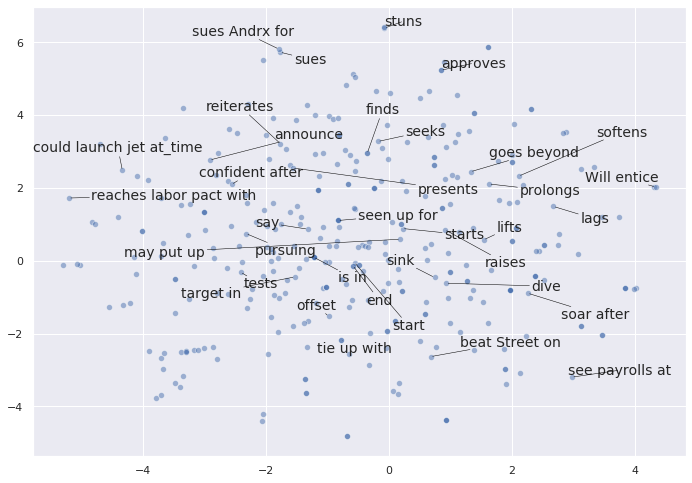

In [0]:
plot_tsne(tsne_relation, relationDF)

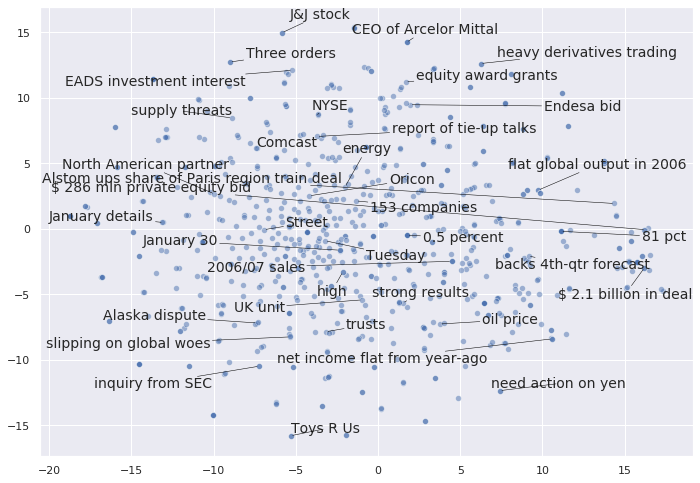

In [0]:
plot_tsne(tsne_object, objectDF, skip=20)

In [ ]:
plot_tsne(tsne_subject, subjectDF)

# **Visualization of USE Embedding**

In [8]:
useDF = pd.read_pickle(DATA_PATH + "/sentence_frame.pkl")

NameError: name 'pd' is not defined

In [0]:
use_embedd = pd.read_pickle(DATA_PATH + "/use_embeddings_result.pkl")


,use_embeddings,time
0,"[0.015777053, -0.03613988, 0.046614792, -0.052...","(2007, 11, 29, 21, 38, 7, 3, 333, -1)"
1,"[0.048788056, -0.06268013, -0.03979131, 0.0017...","(2007, 11, 29, 8, 15, 2, 3, 333, -1)"
2,"[0.053301297, -0.0064970586, -0.03770192, -0.0...","(2007, 11, 29, 21, 16, 34, 3, 333, -1)"
3,"[0.033276, -0.09180895, -0.0041335635, 0.00887...","(2007, 11, 29, 22, 35, 53, 3, 333, -1)"
4,"[-0.029104069, 0.034960084, -0.060233478, 0.00...","(2012, 12, 21, 9, 9, 29, 4, 356, -1)"
...,...,...
553862,"[0.00028035423, -0.0808258, 0.008425885, 0.019...","(2013, 11, 19, 22, 49, 0, 1, 323, -1)"
553863,"[0.00803918, -0.04394041, -0.053863462, 0.0312...","(2013, 11, 19, 20, 13, 0, 1, 323, -1)"
553864,"[0.070839085, -0.071056604, 0.05933676, -0.028...","(2013, 11, 19, 20, 6, 0, 1, 323, -1)"
553865,"[0.019076766, -0.0960133, 0.03736691, 0.019570...","(2013, 11, 19, 20, 8, 0, 1, 323, -1)"


In [0]:
#zip word and corresponding embedding together and turn it into DataFrame
sentence = useDF[:1000].Sentence
use_embeddings = use_embedd[:1000].use_embeddings
use_Zip = zip(sentence.to_list(), use_embeddings.to_list())

In [0]:
# Cast to a dict so we can turn it into a DataFrame
use_Dict = dict(use_Zip)

In [0]:
use_DF = pd.DataFrame.from_dict(use_Dict, orient='index')

In [0]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne_use = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

use_tsne= tsne_use.fit_transform(use_DF)

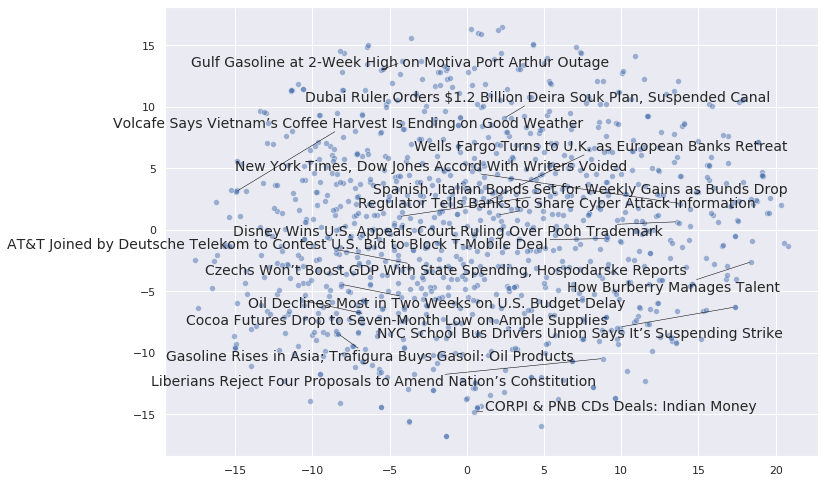

In [0]:
plot_tsne(use_tsne, use_DF,skip=60)

In [0]:
ieDF = pd.read_pickle(DATA_PATH + "/event-tuples.pkl")
ieDF=pd.DataFrame(ieDF)


In [0]:
use_event_embedd = pd.read_pickle(DATA_PATH + "/use_event_embeddings.pkl")

In [0]:
subject = ieDF[:1000].subject
use_subjectEmbedding = use_event_embedd[:1000].USE_subject_embedding
use_subjectZip = zip(subject.to_list(), use_subjectEmbedding.to_list())

relation = ieDF[:1000].relation
use_relationEmbedding = use_event_embedd[:1000].USE_relation_embedding
use_relationZip = zip(relation.to_list(), use_relationEmbedding.to_list())

objectNews = ieDF[:1000].object
use_objectEmbedding = use_event_embedd[:1000].USE_object_embedding
use_objectZip = zip(objectNews.to_list(), use_objectEmbedding.to_list())

In [0]:
# Cast to a dict so we can turn it into a DataFrame
use_subjectDict = dict(use_subjectZip)
use_relationDict = dict(use_relationZip)
use_objectDict = dict(use_objectZip)

In [0]:
use_subjectDF = pd.DataFrame.from_dict(use_subjectDict, orient='index')
use_relationDF = pd.DataFrame.from_dict(use_relationDict, orient='index')
use_objectDF = pd.DataFrame.from_dict(use_objectDict, orient='index')

In [0]:
from sklearn.manifold import TSNE

# Initialize t-SNE
use_tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

use_tsne_subject = use_tsne.fit_transform(use_subjectDF)
use_tsne_relation = use_tsne.fit_transform(use_relationDF)
use_tsne_object = use_tsne.fit_transform(use_objectDF)

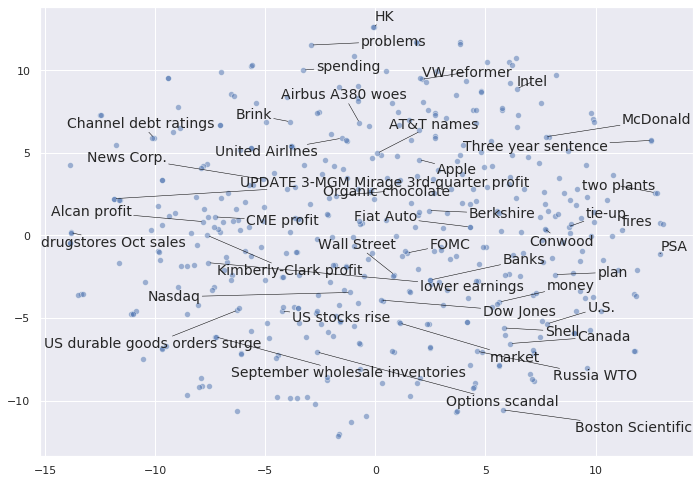

In [0]:
plot_tsne(use_tsne_subject, use_subjectDF)

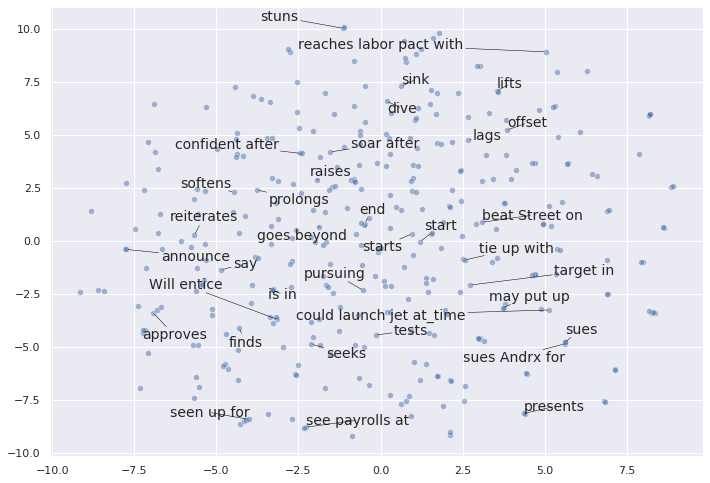

In [0]:
plot_tsne(use_tsne_relation, use_relationDF)

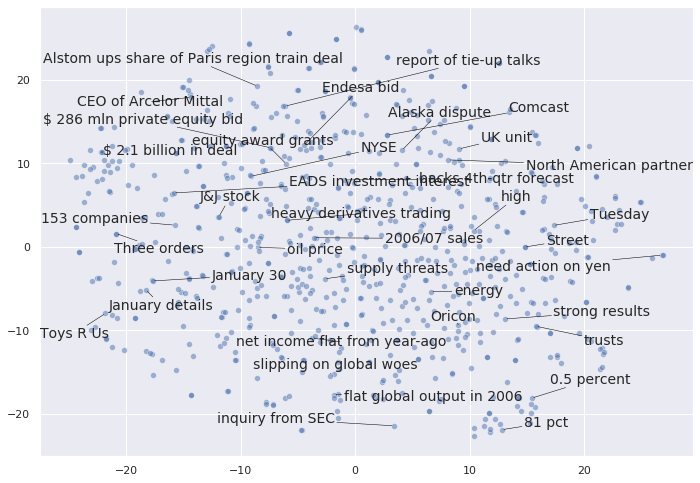

In [0]:
plot_tsne(use_tsne_object, use_objectDF,skip=20)

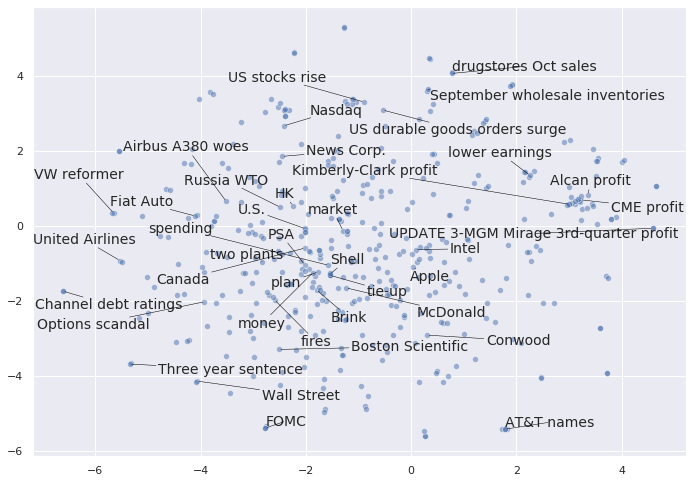

In [0]:
plot_tsne(tsne_subject, subjectDF)

# **Averaging Word2Vec word embeddings each day**

In [0]:
# Load word2vec results
vec = pd.read_pickle(DATA_PATH + "/wordEmbedingVecDF.pkl")
# Sum values of first three columns for each row
vec['vector'] = vec.object + vec.relation + vec.subject
# Drop extraneous columns
vec = vec.drop(['object', 'relation', 'subject'], axis = 1)

In [0]:
# Store vec object
vec.to_pickle(DATA_PATH + "/vec.pkl")

In [0]:
# Remove intra-day time information
from time import gmtime, strftime
for index, row in vec.iterrows():
  row['time'] = strftime("%Y-%m-%d", row['time'])

In [0]:
# Create a new data frame to store average vector at each time
ave_vec = pd.DataFrame(columns=['ave_vec', 'time'])
grouped = vec.groupby('time')
for name, group in grouped:
  curr_time = name
  all_vec = group['vector']
  all_vec = all_vec.to_numpy()
  curr_ave = np.mean(all_vec)
  ave_vec = ave_vec.append({'time': curr_time, 'ave_vec': curr_ave}, ignore_index=True)

In [0]:
# Store ave_vec object
ave_vec.to_pickle(DATA_PATH + "/ave_vec.pkl")

# **Average Bert embeddings each day**

In [0]:
vec = pd.read_pickle(DATA_PATH+'YZ_Bert_formattedData.pkl')

In [47]:
ave_vec_bert=[]
for i in range(502):
  ave_vec_bert.append(np.mean(vec['embeddings'][i],axis=0))
label_bert=vec.iloc[:,0].values.tolist()
label_bert=pd.DataFrame(label_bert,columns=['label'])

,label
0,1
1,1
2,1
3,0
4,0
...,...
497,0
498,0
499,1
500,1


In [48]:
ave_vec_bert=pd.Series(ave_vec_bert)
ave_vec_bert=pd.DataFrame(ave_vec_bert,columns=['ave_vec'])

,ave_vec
0,"[0.038462523, -0.18077753, -0.18291149, 0.0623..."
1,"[0.02362672, -0.17305711, -0.19338004, 0.01048..."
2,"[0.026506623, -0.16541083, -0.20487596, 0.0369..."
3,"[0.027120706, -0.15443935, -0.19251707, 0.0252..."
4,"[0.043162484, -0.1513631, -0.18740669, 0.02897..."
...,...
497,"[0.02696906, -0.14371902, -0.17880964, 0.03898..."
498,"[0.032680064, -0.15660015, -0.175551, 0.053564..."
499,"[0.049228165, -0.15770064, -0.17413189, 0.0451..."
500,"[0.054347575, -0.12625365, -0.15081006, 0.0489..."


In [49]:
time=vec.index.values.tolist()
time=pd.DataFrame(time,columns=['time'])

,time
0,2011-11-28
1,2011-11-29
2,2011-11-30
3,2011-12-01
4,2011-12-02
...,...
497,2013-11-19
498,2013-11-20
499,2013-11-21
500,2013-11-22


In [50]:
ave_vec_bert2=pd.concat([ave_vec_bert,label_bert,time],axis=1)

,ave_vec,label,time
0,"[0.038462523, -0.18077753, -0.18291149, 0.0623...",1,2011-11-28
1,"[0.02362672, -0.17305711, -0.19338004, 0.01048...",1,2011-11-29
2,"[0.026506623, -0.16541083, -0.20487596, 0.0369...",1,2011-11-30
3,"[0.027120706, -0.15443935, -0.19251707, 0.0252...",0,2011-12-01
4,"[0.043162484, -0.1513631, -0.18740669, 0.02897...",0,2011-12-02
...,...,...,...
497,"[0.02696906, -0.14371902, -0.17880964, 0.03898...",0,2013-11-19
498,"[0.032680064, -0.15660015, -0.175551, 0.053564...",0,2013-11-20
499,"[0.049228165, -0.15770064, -0.17413189, 0.0451...",1,2013-11-21
500,"[0.054347575, -0.12625365, -0.15081006, 0.0489...",1,2013-11-22


In [0]:
ave_vec_bert2.to_pickle(DATA_PATH+'/ave_vec_bert.pkl')

# **Average SIF embeddings each day**

In [0]:
import pandas as pd
import pickle
import numpy as np

In [0]:
vec = pd.read_pickle(DATA_PATH + "/sif.pkl")
# Remove intra-day time information
import os
import pandas as pd
import time
from time import gmtime, strftime
for index, row in vec.iterrows():
  row['Time'] = strftime("%Y-%m-%d", row['Time'])
# Create a new data frame to store average vector at each time
ave_vec = pd.DataFrame(columns=['ave_vec', 'time'])
grouped = vec.groupby('Time')

for name, group in grouped:
  curr_time = name
  all_vec = group['SIF_embedding']
  all_vec = all_vec.to_numpy()
  curr_ave = np.mean(all_vec)
  ave_vec = ave_vec.append({'time': curr_time, 'ave_vec': curr_ave}, ignore_index=True)
# Store ave_vec object
ave_vec.to_pickle(DATA_PATH + "/ave_vec_sif.pkl")

KeyboardInterrupt: ignored

# **Average USE embeddings each day**

In [0]:
vec = pd.read_pickle(DATA_PATH + "/use.pkl")
# Remove intra-day time information
import os
import pandas as pd
import time
from time import gmtime, strftime
for index, row in vec.iterrows():
  row['Time'] = strftime("%Y-%m-%d", row['Time'])
# Create a new data frame to store average vector at each time
ave_vec = pd.DataFrame(columns=['ave_vec', 'time'])
grouped = vec.groupby('Time')

for name, group in grouped:
  curr_time = name
  all_vec = group['USE_embedding']
  all_vec = all_vec.to_numpy()
  curr_ave = np.mean(all_vec)
  ave_vec = ave_vec.append({'time': curr_time, 'ave_vec': curr_ave}, ignore_index=True)
# Store ave_vec object
ave_vec.to_pickle(DATA_PATH + "/ave_vec_use.pkl")
ave_vec

,ave_vec,time
0,"[0.010290231, -0.059891123, 0.012306564, 0.032...",2006-10-20
1,"[0.007186381, -0.039613187, 0.0063393936, -0.0...",2006-10-21
2,"[0.018105384, -0.039429564, -0.02969928, 0.019...",2006-10-22
3,"[0.021143194, -0.04532994, -0.018850742, 0.006...",2006-10-23
4,"[0.009847815, -0.04559405, -0.018259343, 0.012...",2006-10-24
...,...,...
2588,"[0.015171954, -0.033180304, -0.0075818715, 0.0...",2013-11-22
2589,"[0.016713781, -0.040582582, -0.015126908, 0.00...",2013-11-23
2590,"[0.01639638, -0.041509822, -0.025484422, 0.000...",2013-11-24
2591,"[0.020194463, -0.036708716, -0.006326767, 0.00...",2013-11-25


# **Remove Weekend and Holiday Data**

In [0]:
all_data = pd.read_pickle(DATA_PATH + "/ave_vec_sif.pkl")

In [0]:
all_data.iloc[[0,3]]


,ave_vec,time
0,"[-0.020414041, -0.014801587, -0.040536683, 0.0...",2006-10-20
3,"[-0.029219486, 0.027241932, 0.019905599, 0.067...",2006-10-23


In [0]:
SP500_movement_direction = pd.read_pickle(DATA_PATH + "/SP500_movement_direction.pkl")
real_time=set(SP500_movement_direction['time'])
del_list=[]
for i in range(len(all_data['time'])):
  if not all_data['time'][i] in real_time:
    del_list.append(i)



In [0]:
data=all_data.drop(del_list)
data=data.reset_index(drop=True)

In [0]:
data

,ave_vec,time
0,"[-0.020414041, -0.014801587, -0.040536683, 0.0...",2006-10-20
1,"[-0.029219486, 0.027241932, 0.019905599, 0.067...",2006-10-23
2,"[-0.02934627, 0.0063221417, -0.0036262965, 0.0...",2006-10-24
3,"[-0.029896643, 0.029835552, -0.005399765, 0.09...",2006-10-25
4,"[-0.03791479, -0.0030595264, -0.01688074, 0.08...",2006-10-26
...,...,...
1783,"[0.00427686, 0.0010060584, -0.0015659491, 0.00...",2013-11-20
1784,"[-0.0021046712, -0.00455972, 0.009557506, 0.00...",2013-11-21
1785,"[-0.0033799112, -0.010696553, 0.00884727, 0.00...",2013-11-22
1786,"[-0.004803134, 0.001118038, 0.0077731693, 0.00...",2013-11-25


# Logistic Regression 

In [0]:
import sklearn
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold # import KFold
from sklearn import datasets

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

X = list(data['ave_vec'])
y = list(SP500_movement_direction['GSPC.Adjusted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)

#model evaluation
train_score = model.score(X_train, y_train)
y_pred_train = model.predict(X_train)
train_precision, train_recall, train_fscore, train_support = precision_recall_fscore_support(y_train, y_pred_train, average="binary")
test_score = model.score(X_test, y_test)
y_pred_test = model.predict(X_test)
test_precision, test_recall, test_fscore, test_support = precision_recall_fscore_support(y_test, y_pred_test, average="binary")

result = {
  'train_accuracy': train_score, 
  'train_precision': train_precision, 
  'train_recall': train_recall, 
  'train_fscore': train_fscore, 
  'test_accuracy': test_score, 
  'test_precision': test_precision, 
  'test_recall': test_recall, 
  'test_fscore': test_fscore,
}

print(result)


{'train_accuracy': 0.5797202797202797, 'train_precision': 0.5705882352941176, 'train_recall': 0.978562421185372, 'train_fscore': 0.72085462145843, 'test_accuracy': 0.5335195530726257, 'test_precision': 0.5350877192982456, 'test_recall': 0.9581151832460733, 'test_fscore': 0.6866791744840525}


In [0]:
training_dataset={} #a dictionary, key: date, value: training value
val_dataset={}
lt_days=30
mt_days=7
for i in range(lt_days,1407):
  lt=np.array(data['ave_vec'][i-lt_days:i])
  mt=np.array(data['ave_vec'][i-mt_days:i])
  st=np.array(data['ave_vec'][i-1])
  label=SP500_movement_direction['GSPC.Adjusted	'][i]
  training_dataset[data['time'][i]]=[lt,mt,st,label]
for i in range(1407,len(data['time'])):
  lt=np.array(data['ave_vec'][i-lt_days:i])
  mt=np.array(data['ave_vec'][i-mt_days:i])
  st=np.array(data['ave_vec'][i-1])
  label=SP500_movement_direction['GSPC.Adjusted	'][i]
  val_dataset[data['time'][i]]=[lt,mt,st,label]

KeyError: ignored

# **CNN1**

In [0]:
import json
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
#import cPickle as pickle
import pickle
import os
from datetime import datetime, timedelta
import pandas as pd

xrange=range
DATA_PATH_PIC = "/content/drive/My Drive/CS230 Stock Project/data/PIC/batch_size1_version1/" #store checkpoints

'''
  params:
        lt_days: meaning: number of long term days
                 contained function: _init_ (with a diff name: self.max_long_term),main
        mt_days: meaning: number of mid term days
                 contained function: _init_ (with a diff name: self.max_mid_term),main
        self.d: meaning: size of word embedding vector
                contained function: _init_
        word embeddings: 
                                    contained function: main; 
                                    change method: load data from different pkl files
        
        

'''



class CNN():

    def __init__(self, sess):
        
        self.sess = sess
        self.epochs = 100
        self.batch_size =10

        self.l2_lambda = 1e-4
        self.lr = 1e-4

        self.d = 300
        self.l = 3

        self.max_mid_term = 7
        self.max_long_term = 30

        self.checkpoint_dir = '/content/drive/My Drive/CS230 Stock Project/checkpoints/'
        self.build_model()

    def build_model(self):
        #define input layers
        self.long_term_events = tf.placeholder(tf.float32, [self.batch_size, self.max_long_term, self.d], name='long_term_events')
        self.mid_term_events = tf.placeholder(tf.float32, [self.batch_size, self.max_mid_term, self.d], name='mid_term_events')
        self.short_term_events = tf.placeholder(tf.float32, [self.batch_size, None, self.d], name='short_term_events')
        
        #define output layers
        self.labels = tf.placeholder(tf.float32, [self.batch_size], name='labels')

        #define hidden layers/convolution layers
        self.long_term_conv = self.conv1d(self.long_term_events, output_dim=self.d, name='long_term_conv')
        self.mid_term_conv = self.conv1d(self.mid_term_events, output_dim=self.d, name='mid_term_conv')

        #define pooling layers
        self.long_term_pool = tf.reduce_max(self.long_term_conv, axis=2)
        
      
        self.mid_term_pool = tf.reduce_max(self.mid_term_conv, axis=2)
        self.short_term_pool = tf.reduce_mean(self.short_term_events, axis=1)

        #concatenate long_term, mid_term, and short_term pool into one tensor along the num_event axis 1
        self.v = tf.concat([self.long_term_pool, self.mid_term_pool, self.short_term_pool], axis=1)
 
        #fully connected hidden layers with 100 variables
        self.y = tf.layers.dense(self.v, 100, activation='relu')
        # print self.y.shape

        #output layer
        self.logits = tf.reshape(tf.layers.dense(self.y, 1, activation='sigmoid'), [self.batch_size], name='preds')
        # print self.logits.shape

        # print tf.trainable_variables()
        
        # ce_loss: regular old cross entropy loss; l2_loss: minimize square errors
        self.ce_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=self.labels, logits=self.logits))
        self.l2_loss = sum([tf.reduce_sum(tf.square(var)) for var in tf.trainable_variables()])

        self.loss = self.ce_loss + (self.l2_lambda * self.l2_loss)

        self.saver = tf.train.Saver()

    # Yitian: Sanity check of params
    # param input: the input layer
    # param output_dim: the number of filters to use
    # param k_w: kernel width
    # param d_w: stride 
    def conv1d(self, input, output_dim=1, k_w=3, d_w=1, stddev=0.02, name='conv1d'):
        
        
        with tf.variable_scope(name):

            w = tf.get_variable('w', [k_w, input.get_shape()[-1], output_dim],
                                initializer=tf.truncated_normal_initializer(stddev=stddev))
            conv = tf.nn.conv1d(input, w, stride=d_w, padding='SAME')

            biases = tf.get_variable('biases', [output_dim], initializer=tf.constant_initializer(0.0))
            conv = tf.reshape(tf.nn.bias_add(conv, biases), tf.shape(conv))
            #what does tf.reshape here do? Seems redundant
            return conv


    def train(self, data, val_data):
        cnn_optim = tf.train.AdamOptimizer(self.lr).minimize(self.loss, var_list=tf.trainable_variables())

        init_op = tf.global_variables_initializer()
        self.sess.run(init_op)

        counter = 0
        start_time = time.time()

        losses = []
        ce_losses = []
        l2_losses = []
        tps = []
        fps = []
        tns = []
        fns = []

        for epoch in xrange(self.epochs):
            length = len(data)
            batch_idxs = length // self.batch_size

            batch_loss = 0
            batch_ce_loss = 0
            batch_l2_loss = 0
            batch_per_error = 0
            batch_tp = 0
            batch_fp = 0
            batch_tn = 0
            batch_fn = 0

            for idx in xrange(0, batch_idxs):
                batch_data = data[idx*self.batch_size:(idx+1)*self.batch_size]
                feed_dict = {   
                                self.short_term_events: np.array([batch_data[i][0] for i in range(len(batch_data))]).reshape([self.batch_size,1, self.d]),
                                self.mid_term_events: np.array([batch_data[i][1] for i in range(len(batch_data))]),
                                self.long_term_events: np.array([batch_data[i][2] for i in range(len(batch_data))]),
                                self.labels: np.array([batch_data[i][3] for i in range(len(batch_data))])
                            }
                vlist = tf.trainable_variables()
                vnames = [v.name for v in vlist]
                
                # print vnames
                __ = self.sess.run([cnn_optim, self.logits] + vlist, feed_dict=feed_dict)
                
                _ = __[0]
                logits = __[1]
                
                label = [batch_data[i][3] for i in range(len(batch_data))]
                ce_loss = self.ce_loss.eval(feed_dict)
                l2_loss = self.l2_loss.eval(feed_dict)
                loss = self.loss.eval(feed_dict)

                # print loss, u_loss, l2_loss
                batch_loss += loss
                batch_ce_loss += ce_loss
                batch_l2_loss += l2_loss
          
                for z in range(len(label)):

                  if label[z] == 1 and logits[z] > .5:
                      batch_tp += 1.0
                  if label[z] == 0 and logits[z] > .5:
                      batch_fp += 1.0
                  if label[z] == 0 and logits[z] <= .5:
                      batch_tn += 1.0
                  if label[z] == 1 and logits[z] <= .5:
                      batch_fn += 1.0
                
                
                counter += 1
                print('Train Epoch: [%2d] [%4d/%4d] time: %4.4f, loss: %.8f, ce_loss: %.8f, l2_loss: %.8f' \
                    % (epoch, idx, batch_idxs,
                        time.time() - start_time, loss, ce_loss, l2_loss))           
              
                print (logits, feed_dict[self.labels])

            batch_loss /= batch_idxs
            batch_ce_loss /= batch_idxs
            batch_l2_loss /= batch_idxs
            losses += [[batch_loss]]
            ce_losses += [[batch_ce_loss]]
            l2_losses += [[self.l2_lambda * batch_l2_loss]]
            tps += [[batch_tp]]
            fps += [[batch_fp]]
            tns += [[batch_tn]]
            fns += [[batch_fn]]
            # print losses

# -------------------VALIDATION----------------------

            # val_length = min(len(val_data), self.val_size)
            val_length = len(val_data)
            val_batch_idxs = val_length // self.batch_size

            batch_loss = 0
            batch_ce_loss = 0
            batch_l2_loss = 0
            batch_per_error = 0
            batch_tp = 0
            batch_fp = 0
            batch_tn = 0
            batch_fn = 0

            for idx in xrange(0, val_batch_idxs):
                batch_data = val_data[idx*self.batch_size:(idx+1)*self.batch_size]
                feed_dict = {   
                                self.short_term_events: np.array([batch_data[i][0] for i in range(len(batch_data))]).reshape([self.batch_size,1, self.d]),
                                self.mid_term_events: np.array([batch_data[i][1] for i in range(len(batch_data))]),
                                self.long_term_events: np.array([batch_data[i][2] for i in range(len(batch_data))]),
                                self.labels: np.array([batch_data[i][3] for i in range(len(batch_data))])
                            }
                
                
                ce_loss = self.ce_loss.eval(feed_dict)
                
                l2_loss = self.l2_loss.eval(feed_dict)
                loss = self.loss.eval(feed_dict)
                logits = self.logits.eval(feed_dict)

                label = batch_data[0][3].tolist()
                
                # print loss, u_loss, l2_loss
                batch_loss += loss
                batch_ce_loss += ce_loss
                batch_l2_loss += l2_loss
               
                if np.isscalar(label):
                   label=[label]
                for z in range(len(label)):
                      if label[z] == 1 and logits[z] > .5:
                          batch_tp += 1.0
                      if label[z] == 0 and logits[z] > .5:
                          batch_fp += 1.0
                      if label[z] == 0 and logits[z] <= .5:
                          batch_tn += 1.0
                      if label[z] == 1 and logits[z] <= .5:
                          batch_fn += 1.0
                  
                

                print('Val Epoch: [%2d] [%4d/%4d] time: %4.4f, loss: %.8f, ce_loss: %.8f, l2_loss: %.8f' \
                    % (epoch, idx, val_batch_idxs,
                        time.time() - start_time, loss, ce_loss, l2_loss))

            batch_loss /= val_batch_idxs
            batch_ce_loss /= val_batch_idxs
            batch_l2_loss /= val_batch_idxs
            losses[-1] += [batch_loss]
            ce_losses[-1] += [batch_ce_loss]
            l2_losses[-1] += [self.l2_lambda * batch_l2_loss]
            tps[-1] += [batch_tp]
            fps[-1] += [batch_fp]
            tns[-1] += [batch_tn]
            fns[-1] += [batch_fn]

            losses_arr = np.array(losses)
            ce_losses_arr = np.array(ce_losses)
            l2_losses_arr = np.array(l2_losses)

            tps_arr = np.array(tps)
            fps_arr = np.array(fps)
            tns_arr = np.array(tns)
            fns_arr = np.array(fns)


            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(losses_arr))], losses_arr[:,0], label='total loss', color='b')
            plt.plot([i+1 for i in range(len(ce_losses_arr))], ce_losses_arr[:,0], label='ce loss', color='g')
            plt.plot([i+1 for i in range(len(l2_losses_arr))], l2_losses_arr[:,0], label='l2 loss', color='r')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'trn_losses.png')

            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(tps_arr))], tps_arr[:,0], label='tp', color='b')
            plt.plot([i+1 for i in range(len(fps_arr))], fps_arr[:,0], label='fp', color='g')
            plt.plot([i+1 for i in range(len(tns_arr))], tns_arr[:,0], label='tn', color='r')
            plt.plot([i+1 for i in range(len(fns_arr))], fns_arr[:,0], label='fn', color='c')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'trn_pns.png')

            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide((tps_arr+tns_arr)[:,0], (tps_arr+tns_arr+fps_arr+fns_arr)[:,0]), label='acc', color='b')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide(tps_arr[:,0], (tps_arr+fps_arr)[:,0]), label='precision', color='g')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide(tps_arr[:,0], (tps_arr+fns_arr)[:,0]), label='recall', color='r')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'trn_acc.png')


            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(losses_arr))], losses_arr[:,1], label='total loss', color='b')
            plt.plot([i+1 for i in range(len(ce_losses_arr))], ce_losses_arr[:,1], label='ce loss', color='g')
            plt.plot([i+1 for i in range(len(l2_losses_arr))], l2_losses_arr[:,1], label='l2 loss', color='r')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'val_losses.png')

            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(tps_arr))], tps_arr[:,1], label='tp', color='b')
            plt.plot([i+1 for i in range(len(fps_arr))], fps_arr[:,1], label='fp', color='g')
            plt.plot([i+1 for i in range(len(tns_arr))], tns_arr[:,1], label='tn', color='r')
            plt.plot([i+1 for i in range(len(fns_arr))], fns_arr[:,1], label='fn', color='c')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'val_pns.png')

            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide((tps_arr+tns_arr)[:,1], (tps_arr+tns_arr+fps_arr+fns_arr)[:,1]), label='acc', color='b')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide(tps_arr[:,1], (tps_arr+fps_arr)[:,1]), label='precision', color='g')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide(tps_arr[:,1], (tps_arr+fns_arr)[:,1]), label='recall', color='r')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'val_acc.png')

            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(losses_arr))], losses_arr[:,0], label='train total loss', color='b')
            plt.plot([i+1 for i in range(len(ce_losses_arr))], ce_losses_arr[:,0], label='train ce loss', color='g')
            plt.plot([i+1 for i in range(len(l2_losses_arr))], l2_losses_arr[:,0], label='train l2 loss', color='r')
            plt.plot([i+1 for i in range(len(losses_arr))], losses_arr[:,1], label='val total loss', linestyle='--', color='b')
            plt.plot([i+1 for i in range(len(ce_losses_arr))], ce_losses_arr[:,1], label='val ce loss', linestyle='--', color='g')
            plt.plot([i+1 for i in range(len(l2_losses_arr))], l2_losses_arr[:,1], label='val l2 loss', linestyle='--', color='r')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'losses.png')

            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(tps_arr))], tps_arr[:,0], label='train tp', color='b')
            plt.plot([i+1 for i in range(len(fps_arr))], fps_arr[:,0], label='train fp', color='g')
            plt.plot([i+1 for i in range(len(tns_arr))], tns_arr[:,0], label='train tn', color='r')
            plt.plot([i+1 for i in range(len(fns_arr))], fns_arr[:,0], label='train fn', color='c')
            plt.plot([i+1 for i in range(len(tps_arr))], tps_arr[:,1], label='val tp', linestyle='--', color='b')
            plt.plot([i+1 for i in range(len(fps_arr))], fps_arr[:,1], label='val fp', linestyle='--', color='g')
            plt.plot([i+1 for i in range(len(tns_arr))], tns_arr[:,1], label='val tn', linestyle='--', color='r')
            plt.plot([i+1 for i in range(len(fns_arr))], fns_arr[:,1], label='val fn', linestyle='--', color='c')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'pns.png')

            plt.figure(figsize=(16,10))
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide((tps_arr+tns_arr)[:,0], (tps_arr+tns_arr+fps_arr+fns_arr)[:,0]), label='train acc', color='b')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide(tps_arr[:,0], (tps_arr+fps_arr)[:,0]), label='train precision', color='g')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide(tps_arr[:,0], (tps_arr+fns_arr)[:,0]), label='train recall', color='r')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide((tps_arr+tns_arr)[:,1], (tps_arr+tns_arr+fps_arr+fns_arr)[:,1]), label='val acc', linestyle='--', color='b')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide(tps_arr[:,1], (tps_arr+fps_arr)[:,1]), label='val precision', linestyle='--', color='g')
            plt.plot([i+1 for i in range(len(tps_arr))], np.divide(tps_arr[:,1], (tps_arr+fns_arr)[:,1]), label='val recall', linestyle='--', color='r')
            plt.legend()
            plt.savefig(DATA_PATH_PIC+'acc.png')



def main(_):
    SP500_movement_direction = pd.read_pickle(DATA_PATH + "/SP500_movement_direction.pkl")
    all_data = pd.read_pickle(DATA_PATH + "/ave_vec_sif.pkl") #place to change word embedding method
    real_time=set(SP500_movement_direction['time'])
    del_list=[]
    for i in range(len(all_data['time'])):
      if not all_data['time'][i] in real_time:
        del_list.append(i)

    data=all_data.drop(del_list)
    data=data.reset_index(drop=True)
    print(len(data['ave_vec'][0]))

    training_dataset=[]
    val_dataset=[]
    lt_days=30 #long term days number
    mt_days=7 #mid term days number
    for i in range(lt_days,int(len(data['time'])*0.8)):
      lt=data['ave_vec'][i-lt_days:i]
      mt=data['ave_vec'][i-mt_days:i]
      st=data['ave_vec'][i-1]
      label=SP500_movement_direction['GSPC.Adjusted'][i]
      #label=data['label'][i]
      training_dataset.append([st,mt,lt,label])
    for i in range(int(len(data['time'])*0.8),len(data['time'])):
      lt=data['ave_vec'][i-lt_days:i]
      mt=data['ave_vec'][i-mt_days:i]
      st=data['ave_vec'][i-1]
      label=SP500_movement_direction['GSPC.Adjusted'][i]
      #label=data['label'][i]
      val_dataset.append([st,mt,lt,label])
    tf.reset_default_graph()
    with tf.Session() as sess:
          model = CNN(sess)
          model.train(training_dataset, val_dataset)

if __name__ == '__main__':
    tf.app.run()

I0308 22:09:58.947934 140440190400384 utils.py:141] NumExpr defaulting to 4 threads.


NameError: ignored

# **CNN2**

In [0]:
import random
import numpy as np
import operator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
'''
  params to adjust: word embeddings: 
                                    contained function: get_Feature_Label; 
                                    change method: load data from different pkl files
                    lt_days:
                            meaning: the number of past days we are using
                            contained function: CNN,get_Feature_Label
                            
                    wb_size:
                            meaning: the size of one word embedding vector
                            contained function:CNN,get_Feature_Label
                            
                    thres: 
                          meaning: the bar of outputting prediction as 0 or 1 (an important parameter)
                          contained function: evaluate
                          
  '''

def value2int(y, clusters=2):
  '''not used'''
    label = np.copy(y)
    label[y < np.percentile(y, 100 / clusters)] = 0
    for i in range(1, clusters):
        label[y > np.percentile(y, 100 * i / clusters)] = i
    return label

def value2int_simple(y):
  '''not used'''
    label = np.copy(y)
    label[y <=0] = 0
    label[y > 0] = 1
    return label

def get_Feature_Label(clusters=2, hasJunk=True):
    SP500_movement_direction = pd.read_pickle(DATA_PATH + "/SP500_movement_direction.pkl")
    # all_data = pd.read_pickle(DATA_PATH + "/ave_vec.pkl")   
    all_data = pd.read_pickle(DATA_PATH + "/ave_vec_sif.pkl")    #  place to change word embeddings "ave_vec_sif is the word embedding gotten from sif"
    real_time=set(SP500_movement_direction['time'])
    del_list=[]
    for i in range(len(all_data['time'])):
      #if (not all_data['time'][i] in real_time) or not (all_data['time'][i].startswith("2012") or all_data['time'][i].startswith("2013")): #using all data or data from 2012 to 2013
      if (not all_data['time'][i] in real_time) :  #remove holidays and weekends
        del_list.append(i)
    data=all_data.drop(del_list)
    data=data.reset_index(drop=True)

    x_train=[]
    y_train=[]
    x_val=[]
    y_val=[]
    val_dataset=[]
    lt_days=20  #the number of past days we are using
    wb_size=300  #size of one word embedding vector
    #getting training data 
    for i in range(lt_days,int(len(data['time'])*0.8)):
      lt=data['ave_vec'][i-lt_days:i]
      label=SP500_movement_direction['GSPC.Adjusted'][i]
      #label=data['label'][i]
      x_train.append(lt)
      y_train.append(label)
    x_train=np.array(x_train)
    y_train2=np.array(y_train)
    y_train= to_categorical(value2int_simple(y_train2)).astype("int")
    #getting validation data
    for i in range(int(len(data['time'])*0.8),len(data['time'])):
      lt=data['ave_vec'][i-lt_days:i]
      label=SP500_movement_direction['GSPC.Adjusted'][i]
      #label=data['label'][i]
      x_val.append(lt)
      y_val.append(label)
    x_val=np.array(x_val)
    y_val2=np.array(y_val)
    y_val= to_categorical(value2int_simple(y_val2)).astype("int") 
    x_train = x_train.reshape(x_train.shape[0], lt_days, wb_size, 1).astype('float32')
    x_val = x_val.reshape(x_val.shape[0], lt_days, wb_size, 1).astype('float32')


    return x_train, y_train, x_val, y_val


def CNN(clusters):
    '''
    paper: 61.73%
    data: all from 2006-2013 (data makes a hugh diff)
    all predict to increase: accuracy 56.7%
    sif: 0.58 accuracy 59%
    word2Vvec: 0.50(no differ from 0.3-0.52) 56.7%
    '''
    lt_days=20  #the number of past days we are using
    wb_size=300  #size of one word embedding vector
    model = Sequential()
    model.add(Convolution2D(64, 3, wb_size, border_mode='valid', input_shape=(lt_days, wb_size, 1), activation='relu')) 
    
    model.add(AveragePooling2D(pool_size=(3, 1)))
    
    model.add(Dropout(0.4))
    model.add(Flatten())
    
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(clusters, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def evaluate(model, clusters, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train, nb_epoch=20, batch_size=110, verbose=2)
    
    # Final evaluation of the model
    score = model.evaluate(x_val, y_val, verbose=0)
    

    predictions = model.predict(x_val)
    ##thres is the bar of outputting prediction as 0 or 1 (an important parameter)
    thres = 0.58; y_cut = (predictions[:,0] > thres) | (predictions[:,1] > thres) # cut y value and leave the better result
    predictions = np.argmax(predictions[y_cut], axis=-1)
    conf = confusion_matrix(np.argmax(y_val[y_cut], axis=-1), predictions) #confusion matrix
    print("Test on %d samples" % (len(y_val[y_cut])))
    print(conf)
    diag=0
    for i in range(clusters):
        print("Test Label %d Precision, %.2f%%" % (i, conf[i,i] * 100.0 / sum(conf[:,i])))
        diag+=conf[i,i]
    print("Test Accuracy, %.2f%%" % (diag * 100.0 / sum(sum(conf))))


def model_selection(clusters): 
  '''
  clusters: output size of CNN
  '''
    #get train and test/validation data (we are not using validation)
    X_train, y_train, X_test, y_test = get_Feature_Label(clusters=clusters)

    for i in range(1):
        print("Trial:", i)
        model = CNN(clusters) 
        evaluate(model, clusters, X_train, y_train, X_test, y_test)
        

def main():
    clusters = 2
    model_selection(clusters)
    


if __name__ == "__main__":
    main()

# **Multilayer Perceptron**

In [0]:
from sklearn.neural_network import MLPRegressor

## **RNN**

In [0]:
import pandas as pd
import numpy as np
import datetime
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import concatenate
from keras.layers import TimeDistributed
from keras.layers import Lambda
from keras.layers import Flatten
from keras.layers import GRU
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.backend import stack
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


Using TensorFlow backend.


BERT

In [0]:
#BERT data preprocessing
formatted_training = pd.read_pickle(DATA_PATH + "YZ_Bert_formattedDataPaded.pkl")
X_train = np.array(list(formatted_training['pad_embeddings']))
y_train = np.array(list(formatted_training[0]))

In [0]:
formatted_training

,0,embeddings,pad_embeddings
2011-11-28,1,"[[0.1460034, -0.05356043, -0.674595, -0.042551...","[[0.14600339531898499, -0.05356042832136154, -..."
2011-11-29,1,"[[0.5021139, 0.008498493, -0.1453422, 0.217144...","[[0.5021139, 0.008498493, -0.1453422, 0.217144..."
2011-11-30,1,"[[-0.07668818, -0.48566613, -0.010467704, 0.44...","[[-0.07668818, -0.48566613, -0.010467704, 0.44..."
2011-12-01,0,"[[-0.06602967, -0.24900095, -0.41175896, -0.07...","[[-0.06602967, -0.24900095, -0.41175896, -0.07..."
2011-12-02,0,"[[0.08449674, -0.178189, -0.37323597, 0.021555...","[[0.08449673652648926, -0.1781889945268631, -0..."
...,...,...,...
2013-11-19,0,"[[0.2719835, 0.00084312743, -0.22599396, 0.159...","[[0.2719835042953491, 0.0008431274327449501, -..."
2013-11-20,0,"[[-0.109192364, -0.25444546, 0.13826068, 0.517...","[[-0.1091923639178276, -0.25444546341896057, 0..."
2013-11-21,1,"[[-0.05608321, -0.50508165, -0.40836096, -0.18...","[[-0.056083209812641144, -0.5050816535949707, ..."
2013-11-22,1,"[[0.061960045, -0.55416006, 0.04325866, -0.077...","[[0.061960045248270035, -0.5541600584983826, 0..."


In [0]:
#3 day memory for LSTM
#day 1
X_train_1 = X_train

#day 2
X_train_2 = X_train[1:]
X_train_2 = np.append(X_train_2, [X_train[0]], axis=0)

#day 3
X_train_3 = X_train[2:]
X_train_3 = np.append(X_train_3, X_train[:2], axis=0)

y_train_3 = y_train[2:]
y_train_3 = np.append(y_train_3, y_train[:2])


SIF

In [0]:
#load preprocessed data
X_train = np.load(DATA_PATH + "/SIF_formatted_for_sequence_model_all_time.npy", allow_pickle=True)
y_train = np.load(DATA_PATH + "/sequence_model_y_formatted_all_time.npy", allow_pickle=True)

In [0]:
sif = pd.read_pickle(DATA_PATH + "/sif.pkl")

In [0]:
sif

,SIF_embedding,Time,date
0,"[-0.016121186, -0.0037088143, 0.07306299, -0.0...","(2007, 11, 29, 21, 38, 7, 3, 333, -1)",2007-11-29
1,"[-0.06866882, -0.018673673, 0.014548443, -0.03...","(2007, 11, 29, 8, 15, 2, 3, 333, -1)",2007-11-29
2,"[0.012982752, -0.062529415, 0.08771004, 0.0316...","(2007, 11, 29, 21, 16, 34, 3, 333, -1)",2007-11-29
3,"[-0.06656452, 0.022456562, 0.18326671, -0.0023...","(2007, 11, 29, 22, 35, 53, 3, 333, -1)",2007-11-29
4,"[-0.01021819, 0.022093594, 0.0021666437, 0.173...","(2012, 12, 21, 9, 9, 29, 4, 356, -1)",2012-12-21
...,...,...,...
553862,"[0.02382478, 0.08170433, 0.08655949, 0.0389976...","(2013, 11, 19, 22, 49, 0, 1, 323, -1)",2013-11-19
553863,"[-0.000954587, 0.046013318, 0.026912145, 0.049...","(2013, 11, 19, 20, 13, 0, 1, 323, -1)",2013-11-19
553864,"[0.023823272, 0.0859313, 0.110972814, 0.016068...","(2013, 11, 19, 20, 6, 0, 1, 323, -1)",2013-11-19
553865,"[-0.04598549, 0.09811262, -0.0038315319, 0.120...","(2013, 11, 19, 20, 8, 0, 1, 323, -1)",2013-11-19


In [0]:
frequency = pd.read_csv(DATA_PATH + "/time_frequency.csv")
high_frequency = frequency[frequency['Index'] > 10]

In [0]:
#convert Time field into date field in SIF and append to the dataframe
date = [datetime.date(test_time.tm_year, test_time.tm_mon, test_time.tm_mday) for test_time in sif['Time']]
sif['date'] = date

In [0]:
#formatting y value
sp500 = pd.read_pickle(DATA_PATH + "/SP500_movement_direction.pkl")

training_y = {}
for index, row in sp500.iterrows():
  if high_frequency['Date'].str.contains(row['time']).any():
      training_y[row['time']] = row['GSPC.Adjusted']

del training_y['2013-11-26']
y_train = list(training_y.values())


In [0]:
#select continuous data for sequence model
training_X = {}
start_date = datetime.date(2010, 4, 26)
end_date = datetime.date(2013, 11, 26)
day_delta = datetime.timedelta(days=1)

for i in range((end_date - start_date).days):
  curr = start_date + i*day_delta
  training_X[curr.strftime('%Y-%m-%d')]= sif[sif['date'] == curr]

In [0]:
#reshape the data into 3D array; and also padding the data to have same length input
X_train = []
for date in training_y.keys():
  embed = np.array(list(training_X[date]['SIF_embedding']))
  if embed.shape[0] < 500:
    #padding with extra rows of zeros
    embed = np.append(embed, np.zeros((500 - embed.shape[0], 300)), axis=0)
  else:
    embed = embed[:500]
  X_train.append(embed)

X_train = np.array(X_train)

In [0]:
print(len(y_train))
print(X_train.shape)

801
(801, 500, 300)


In [0]:
np.save(DATA_PATH + "/SIF_formatted_for_sequence_model_all_time", X_train, allow_pickle=True)
np.save(DATA_PATH + "/sequence_model_y_formatted_all_time", y_train, allow_pickle=True)

In [0]:
X_test.shape

(729,)

Universal Sentence Embedding

In [0]:
X_train = np.load(DATA_PATH + "/USE_formatted_for_sequence_model_all_time.npy", allow_pickle=True)
y_train = np.load(DATA_PATH + "/USE_sequence_model_y_formatted_all_time.npy", allow_pickle=True)

In [0]:
use = pd.read_pickle(DATA_PATH + "/use.pkl")

In [0]:
use

,USE_embedding,Time,date
0,"[0.015777053, -0.03613988, 0.046614792, -0.052...","(2007, 11, 29, 21, 38, 7, 3, 333, -1)",2007-11-29
1,"[0.048788056, -0.06268013, -0.03979131, 0.0017...","(2007, 11, 29, 8, 15, 2, 3, 333, -1)",2007-11-29
2,"[0.053301297, -0.0064970586, -0.03770192, -0.0...","(2007, 11, 29, 21, 16, 34, 3, 333, -1)",2007-11-29
3,"[0.033276, -0.09180895, -0.0041335635, 0.00887...","(2007, 11, 29, 22, 35, 53, 3, 333, -1)",2007-11-29
4,"[-0.029104069, 0.034960084, -0.060233478, 0.00...","(2012, 12, 21, 9, 9, 29, 4, 356, -1)",2012-12-21
...,...,...,...
553862,"[0.00028035423, -0.0808258, 0.008425885, 0.019...","(2013, 11, 19, 22, 49, 0, 1, 323, -1)",2013-11-19
553863,"[0.00803918, -0.04394041, -0.053863462, 0.0312...","(2013, 11, 19, 20, 13, 0, 1, 323, -1)",2013-11-19
553864,"[0.070839085, -0.071056604, 0.05933676, -0.028...","(2013, 11, 19, 20, 6, 0, 1, 323, -1)",2013-11-19
553865,"[0.019076766, -0.0960133, 0.03736691, 0.019570...","(2013, 11, 19, 20, 8, 0, 1, 323, -1)",2013-11-19


In [0]:
date = [datetime.date(test_time.tm_year, test_time.tm_mon, test_time.tm_mday) for test_time in use['Time']]
use['date'] = date

In [0]:
frequency = pd.read_csv(DATA_PATH + "/time_frequency.csv")
high_frequency = frequency[frequency['Index'] > 10]

#formatting y value
sp500 = pd.read_pickle(DATA_PATH + "/SP500_movement_direction.pkl")

training_y = {}
for index, row in sp500.iterrows():
  if high_frequency['Date'].str.contains(row['time']).any():
      training_y[row['time']] = row['GSPC.Adjusted']

del training_y['2013-11-26']
y_train = list(training_y.values())

In [0]:
#select continuous data for sequence model
training_X = {}
start_date = datetime.date(2010, 4, 26)
end_date = datetime.date(2013, 11, 26)
day_delta = datetime.timedelta(days=1)

for i in range((end_date - start_date).days):
  curr = start_date + i*day_delta
  training_X[curr.strftime('%Y-%m-%d')]= use[use['date'] == curr]

In [0]:
#reshape the data into 3D array; and also padding the data to have same length input
X_train = []
for date in training_y.keys():
  embed = np.array(list(training_X[date]['USE_embedding']))
  if embed.shape[0] < 500:
    #padding with extra rows of zeros
    embed = np.append(embed, np.zeros((500 - embed.shape[0], 512)), axis=0)
  else:
    embed = embed[:500]
  X_train.append(embed)

X_train = np.array(X_train)

In [0]:
print(len(y_train))
print(X_train.shape)

801
(801, 500, 512)


In [0]:
np.save(DATA_PATH + "/USE_formatted_for_sequence_model_all_time", X_train, allow_pickle=True)
np.save(DATA_PATH + "/USE_sequence_model_y_formatted_all_time", y_train, allow_pickle=True)

In [0]:
y_train = np.array(y_train)
y_train.shape

(801,)

## Models

In [0]:
def create_lstm(shape=(500, 768), output=32, regress=False):
  model = Sequential()
  model.add(Bidirectional(LSTM(128, return_sequences=True, dropout= 0.2), input_shape=shape))
  model.add(Bidirectional(LSTM(64, dropout=0.2)))
  model.add(Dense(output, activation='sigmoid'))
  if regress:
    model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
#previous model is overfitting too much, simplify hidden layer
def create_lstm(shape=(500, 768), output=32, hidden_unit=64, regress=False):
  model = Sequential()
  model.add(Bidirectional(LSTM(hidden_unit, dropout= 0.2), input_shape=shape))
  model.add(Dense(output, activation='sigmoid'))
  if regress:
    model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
def create_gru(shape=(500, 768), output=32, hidden_unit=64, regress=False):
  model = Sequential()
  model.add(Bidirectional(GRU(hidden_unit, return_sequences=True, dropout= 0.2, kernel_regularizer=l2(0.01)), input_shape=shape))
  model.add(Flatten())
  model.add(Dense(output, activation='sigmoid', kernel_regularizer=l2(0.01)))
  if regress:
    model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
def create_cnnLSTM(shape=(500, 768), output=32, filters=64, kernel_size=5, pool_size=4, hidden_unit=70, regress=False):
  model = Sequential()
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1, input_shape=shape, kernel_regularizer=l2(0.01)))
  model.add(MaxPooling1D(pool_size=pool_size))
  model.add(LSTM(hidden_unit, kernel_regularizer=l2(0.01)))
  model.add(Dense(output, activation='sigmoid'))
  if regress:
    model.add(Dense(1, activation='sigmoid'))

  return model

In [0]:
#create multiday input continuous dataset
def create_multiday(X_train, y_train, num_days = 3):
  Dict = {}
  num_train = X_train.shape[0]
  for i in range(num_days):
    Dict["X_train_" + str(i)] = X_train[i:i-num_days]
  Dict["y_train"] = y_train[num_days-1:-1]
  return Dict


In [0]:
#split test train set
def train_test_split_sqs(data, ratio=0.2):
  train = {}
  test = {}
  num_data = data['y_train'].shape[0]
  num_training = int(num_data*(1-ratio))
  for key in data.keys():
    train[key] = data[key][:num_training]
    test[key] = data[key][num_training:]
  return train, test


In [0]:
# Visualize training history
import matplotlib.pyplot as plt
def plot_learning_curve(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


In [0]:
# two layers of LSTM, use single day news title, no memory of previous days whatsoever
model_1 = create_lstm(shape=(500,300), regress=True)
model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 500, 256)          439296    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 607,809
Trainable params: 607,809
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model_1.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Train on 640 samples, validate on 161 samples
Epoch 1/15
640/640 [==============================] - 43s 67ms/step - loss: 0.7085 - acc: 0.4812 - val_loss: 0.6798 - val_acc: 0.5901
Epoch 2/15
640/640 [==============================] - 38s 59ms/step - loss: 0.6823 - acc: 0.5516 - val_loss: 0.6783 - val_acc: 0.5901
Epoch 3/15
640/640 [==============================] - 38s 59ms/step - loss: 0.6735 - acc: 0.5875 - val_loss: 0.6802 - val_acc: 0.5839
Epoch 4/15
640/640 [==============================] - 38s 59ms/step - loss: 0.6328 - acc: 0.6250 - val_loss: 0.7080 - val_acc: 0.5342
Epoch 5/15
640/640 [==============================] - 38s 59ms/step - loss: 0.5424 - acc: 0.7438 - val_loss: 0.8170 - val_acc: 0.5714
Epoch 6/15
640/640 [==============================] - 39s 61ms/step - loss: 0.4745 - acc: 0.7922 - val_loss: 0.8397 - val_acc: 0.4969
Epoch 7/15
640/640 [==============================] - 38s 60ms/step - loss: 0.3741 - acc: 0.8391 - val_loss: 0.8021 - val_acc: 0.5031
Epoch 8/15
640/6

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


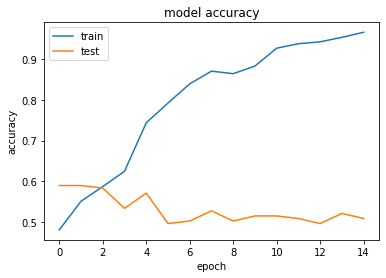

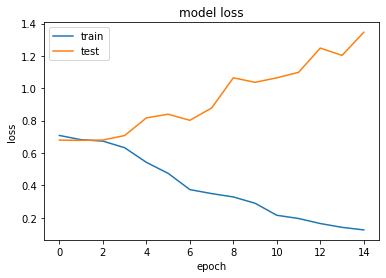

In [0]:
plot_learning_curve(history)

In [0]:
lstm_1 = create_lstm(shape=(500,300))
lstm_2 = create_lstm(shape=(500,300))
lstm_3 = create_lstm(shape=(500,300))

combinedInput = concatenate([lstm_1.output, lstm_2.output, lstm_3.output])

x = Dense(16, activation='relu')(combinedInput)
x = Dense(1, activation='sigmoid')(x)

model_2 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input], outputs=x)

model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_13 (Bidirectio (None, 500, 256)          439296    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_12 (Dense)             (None, 32)                4128      
Total params: 607,776
Trainable params: 607,776
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_15 (Bidirectio (None, 500, 256)          439296    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 128)               164352    
__________________________

Train on 640 samples, validate on 161 samples
Epoch 1/15
640/640 [==============================] - 125s 196ms/step - loss: 0.7012 - acc: 0.5234 - val_loss: 0.6777 - val_acc: 0.5901
Epoch 2/15
640/640 [==============================] - 109s 170ms/step - loss: 0.6850 - acc: 0.5484 - val_loss: 0.6797 - val_acc: 0.5901
Epoch 3/15
640/640 [==============================] - 108s 169ms/step - loss: 0.6672 - acc: 0.5750 - val_loss: 0.6692 - val_acc: 0.6273
Epoch 4/15
640/640 [==============================] - 109s 170ms/step - loss: 0.6204 - acc: 0.6859 - val_loss: 0.6902 - val_acc: 0.6025
Epoch 5/15
640/640 [==============================] - 109s 170ms/step - loss: 0.5627 - acc: 0.7484 - val_loss: 0.7108 - val_acc: 0.5590
Epoch 6/15
640/640 [==============================] - 109s 170ms/step - loss: 0.4752 - acc: 0.8031 - val_loss: 0.7143 - val_acc: 0.5714
Epoch 7/15
640/640 [==============================] - 108s 169ms/step - loss: 0.3788 - acc: 0.8578 - val_loss: 0.7636 - val_acc: 0.5652
Ep

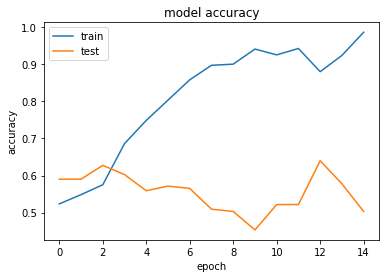

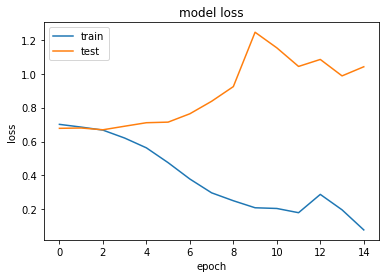

In [0]:
history = model_2.fit([X_train_1, X_train_2, X_train_3], y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.2, shuffle=False)
plot_learning_curve(history)

In [0]:
lstm_1 = create_lstm(shape=(500,300), output=4)
lstm_2 = create_lstm(shape=(500,300), output=4)
lstm_3 = create_lstm(shape=(500,300), output=4)
output_list = [lstm_1.output, lstm_2.output, lstm_3.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(3, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_2 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input], outputs=x)

model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_31 (Bidirectio (None, 500, 256)          439296    
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 516       
Total params: 604,164
Trainable params: 604,164
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_33 (Bidirectio (None, 500, 256)          439296    
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 128)               164352    
________________________

Train on 640 samples, validate on 161 samples
Epoch 1/100
640/640 [==============================] - 134s 210ms/step - loss: 0.6945 - acc: 0.5500 - val_loss: 0.6763 - val_acc: 0.5901
Epoch 2/100
640/640 [==============================] - 109s 171ms/step - loss: 0.6922 - acc: 0.5375 - val_loss: 0.6806 - val_acc: 0.5901
Epoch 3/100
640/640 [==============================] - 110s 172ms/step - loss: 0.6858 - acc: 0.5437 - val_loss: 0.6804 - val_acc: 0.5901
Epoch 4/100
640/640 [==============================] - 110s 172ms/step - loss: 0.6738 - acc: 0.5625 - val_loss: 0.6869 - val_acc: 0.5528
Epoch 5/100
640/640 [==============================] - 113s 176ms/step - loss: 0.6583 - acc: 0.6562 - val_loss: 0.6683 - val_acc: 0.6025
Epoch 6/100
640/640 [==============================] - 113s 176ms/step - loss: 0.6498 - acc: 0.6484 - val_loss: 0.6795 - val_acc: 0.5466
Epoch 7/100
640/640 [==============================] - 113s 177ms/step - loss: 0.6346 - acc: 0.7203 - val_loss: 0.6677 - val_acc: 0.

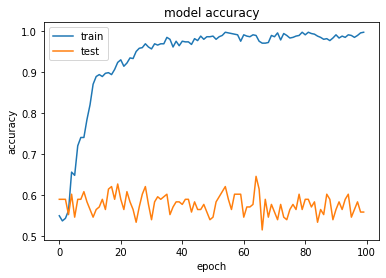

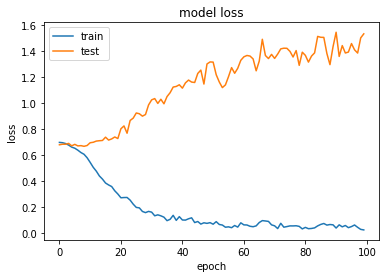

In [0]:
history = model_2.fit([X_train_1, X_train_2, X_train_3], y_train, batch_size=32, epochs=100, verbose=1, validation_split=0.2, shuffle=False)
plot_learning_curve(history)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_12 (Bidirectio (None, 500, 256)          439296    
_________________________________________________________________
dense_20 (Dense)             (None, 500, 16)           4112      
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 8001      
Total params: 451,409
Trainable params: 451,409
Non-trainable params: 0
_________________________________________________________________
Train on 576 samples, validate on 64 samples
Epoch 1/15
576/576 [==============================] - 23s 40ms/step - loss: 0.7987 - acc: 0.5278 - val_loss: 0.7031 - val_acc: 0.4375
Epoch 2/15
576/576 [==============================] - 19s 33ms/ste

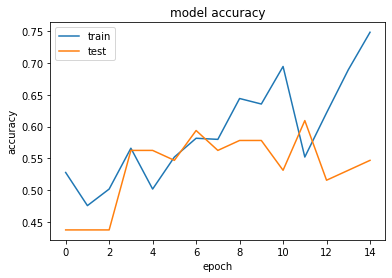

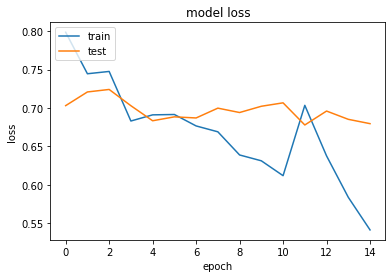

161/161 [==============================] - 2s 14ms/step


ValueError: ignored

In [0]:
#single layer LSTM
model_3 = create_lstm(shape=(500,300), output=16, regress=True)
model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#split test train set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#fitting model
history = model_3.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.1)
plot_learning_curve(history)

#test model
y_pred = model_3.predict(X_test, batch_size=32, verbose=1)
print(classification_report(y_test, y_pred, labels=['down', 'up']))

In [0]:
#test model
y_pred = model_3.predict(X_test, batch_size=32, verbose=1)

print(classification_report(y_test, np.rint(y_pred.reshape(y_pred.shape[0]))))

161/161 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        69
           1       0.56      0.80      0.66        92

    accuracy                           0.53       161
   macro avg       0.48      0.49      0.45       161
weighted avg       0.49      0.53      0.48       161



In [0]:
#get three days of data
data = create_multiday(X_train, y_train, num_days=3)


In [0]:
trainDict, testDict = train_test_split_sqs(data)

In [0]:
for key in trainDict.keys():
  print(trainDict[key].shape)

(509, 500, 300)
(509, 500, 300)
(509, 500, 300)
(509,)


In [0]:

#model 4 different output weights
lstm_1 = create_lstm(shape=(500,300), output=4)
lstm_2 = create_lstm(shape=(500,300), output=8)
lstm_3 = create_lstm(shape=(500,300), output=32)

combinedInput = concatenate([lstm_1.output, lstm_2.output, lstm_3.output])

x = Dense(16, activation='relu')(combinedInput)
x = Dense(1, activation='sigmoid')(x)

model_4 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input], outputs=x)

model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_16 (Bidirectio (None, 500, 256)          439296    
_________________________________________________________________
flatten_3 (Flatten)          (None, 128000)            0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 512004    
Total params: 951,300
Trainable params: 951,300
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_17 (Bidirectio (None, 500, 256)          439296    
_________________________________________________________________
flatten_4 (Flatten)          (None, 128000)            0         
________________________

Train on 458 samples, validate on 51 samples
Epoch 1/15
458/458 [==============================] - 55s 121ms/step - loss: 0.7015 - acc: 0.5524 - val_loss: 0.6828 - val_acc: 0.4902
Epoch 2/15
458/458 [==============================] - 46s 101ms/step - loss: 0.4085 - acc: 0.9410 - val_loss: 0.7232 - val_acc: 0.4902
Epoch 3/15
458/458 [==============================] - 46s 101ms/step - loss: 0.1897 - acc: 0.9956 - val_loss: 0.7268 - val_acc: 0.5294
Epoch 4/15
458/458 [==============================] - 46s 101ms/step - loss: 0.0842 - acc: 0.9956 - val_loss: 0.9274 - val_acc: 0.5098
Epoch 5/15
458/458 [==============================] - 46s 101ms/step - loss: 0.0385 - acc: 1.0000 - val_loss: 1.0375 - val_acc: 0.4902
Epoch 6/15
458/458 [==============================] - 47s 102ms/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.9650 - val_acc: 0.4706
Epoch 7/15
458/458 [==============================] - 53s 117ms/step - loss: 0.0123 - acc: 1.0000 - val_loss: 1.0397 - val_acc: 0.4902
Epoch 8/15

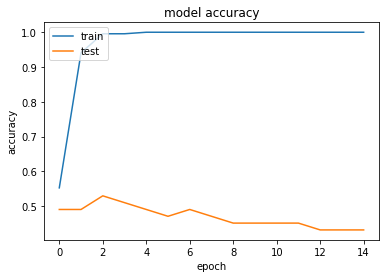

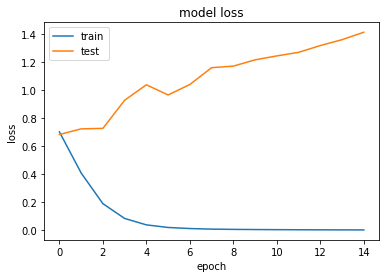

In [0]:
#fitting the model
#removing y_train from dict
#y_train = trainDict['y_train']
#del trainDict['y_train']
history = model_4.fit([trainDict[key] for key in trainDict.keys()], y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

In [0]:
#test model 4 still overfitting a lot.
y_test = testDict['y_train']
del testDict['y_train']
y_pred = model_4.predict([testDict[key] for key in testDict.keys()], batch_size=32, verbose=1)

print(classification_report(y_test, np.rint(y_pred.reshape(y_pred.shape[0]))))

128/128 [==============================] - 5s 38ms/step
              precision    recall  f1-score   support

           0       0.38      0.24      0.29        58
           1       0.52      0.67      0.58        70

    accuracy                           0.48       128
   macro avg       0.45      0.46      0.44       128
weighted avg       0.45      0.48      0.45       128



In [0]:
#model 4 different output weights and reducing the num of hidden layers
lstm_1 = create_lstm(shape=(500,300), hidden_unit=16, output=4)
lstm_2 = create_lstm(shape=(500,300), hidden_unit=32, output=8)
lstm_3 = create_lstm(shape=(500,300), hidden_unit=64, output=16)

combinedInput = concatenate([lstm_1.output, lstm_2.output, lstm_3.output])

x = Dense(16, activation='relu')(combinedInput)
x = Dense(1, activation='sigmoid')(x)

model_4 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input], outputs=x)

model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_19 (Bidirectio (None, 500, 32)           40576     
_________________________________________________________________
flatten_6 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 64004     
Total params: 104,580
Trainable params: 104,580
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_20 (Bidirectio (None, 500, 64)           85248     
_________________________________________________________________
flatten_7 (Flatten)          (None, 32000)             0         
________________________

Train on 458 samples, validate on 51 samples
Epoch 1/15
458/458 [==============================] - 34s 74ms/step - loss: 0.7048 - acc: 0.5153 - val_loss: 0.7005 - val_acc: 0.5098
Epoch 2/15
458/458 [==============================] - 24s 52ms/step - loss: 0.6320 - acc: 0.7358 - val_loss: 0.6842 - val_acc: 0.5490
Epoch 3/15
458/458 [==============================] - 24s 53ms/step - loss: 0.5267 - acc: 0.9148 - val_loss: 0.6739 - val_acc: 0.6275
Epoch 4/15
458/458 [==============================] - 24s 52ms/step - loss: 0.3385 - acc: 1.0000 - val_loss: 0.6806 - val_acc: 0.5882
Epoch 5/15
458/458 [==============================] - 24s 52ms/step - loss: 0.1723 - acc: 1.0000 - val_loss: 0.7209 - val_acc: 0.5686
Epoch 6/15
458/458 [==============================] - 24s 52ms/step - loss: 0.0888 - acc: 1.0000 - val_loss: 0.7491 - val_acc: 0.5882
Epoch 7/15
458/458 [==============================] - 24s 52ms/step - loss: 0.0542 - acc: 1.0000 - val_loss: 1.0442 - val_acc: 0.5294
Epoch 8/15
458/45

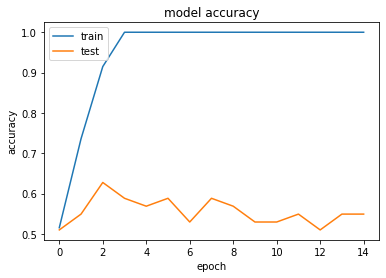

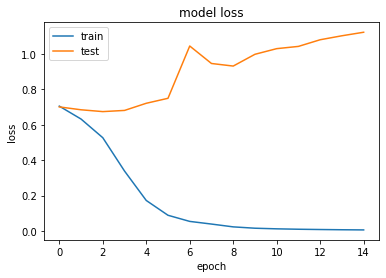

128/128 [==============================] - 4s 31ms/step
              precision    recall  f1-score   support

           0       0.41      0.22      0.29        58
           1       0.53      0.73      0.61        70

    accuracy                           0.50       128
   macro avg       0.47      0.48      0.45       128
weighted avg       0.47      0.50      0.47       128



In [0]:
history = model_4.fit([trainDict[key] for key in trainDict.keys()], y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_4.predict([testDict[key] for key in testDict.keys()], batch_size=32, verbose=1)
print(classification_report(y_test, np.rint(y_pred.reshape(y_pred.shape[0]))))

In [0]:
#model 4 different output weights and further reducing the num of hidden layers
lstm_1 = create_lstm(shape=(500,300), hidden_unit=8, output=4)
lstm_2 = create_lstm(shape=(500,300), hidden_unit=16, output=8)
lstm_3 = create_lstm(shape=(500,300), hidden_unit=32, output=16)

combinedInput = concatenate([lstm_1.output, lstm_2.output, lstm_3.output])

x = Dense(16, activation='relu')(combinedInput)
x = Dense(1, activation='sigmoid')(x)

model_4 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input], outputs=x)

model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_22 (Bidirectio (None, 500, 16)           19776     
_________________________________________________________________
flatten_9 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 32004     
Total params: 51,780
Trainable params: 51,780
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_23 (Bidirectio (None, 500, 32)           40576     
_________________________________________________________________
flatten_10 (Flatten)         (None, 16000)             0         
__________________________

Train on 458 samples, validate on 51 samples
Epoch 1/5
458/458 [==============================] - 31s 69ms/step - loss: 0.6905 - acc: 0.5480 - val_loss: 0.6954 - val_acc: 0.5098
Epoch 2/5
458/458 [==============================] - 20s 44ms/step - loss: 0.5977 - acc: 0.6790 - val_loss: 0.7048 - val_acc: 0.5294
Epoch 3/5
458/458 [==============================] - 20s 44ms/step - loss: 0.4734 - acc: 0.9170 - val_loss: 0.7096 - val_acc: 0.5294
Epoch 4/5
458/458 [==============================] - 20s 44ms/step - loss: 0.3489 - acc: 0.9825 - val_loss: 0.7257 - val_acc: 0.4902
Epoch 5/5
458/458 [==============================] - 20s 44ms/step - loss: 0.2207 - acc: 0.9978 - val_loss: 0.8084 - val_acc: 0.4314
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


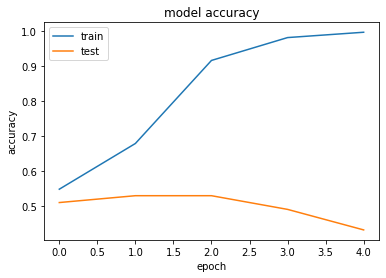

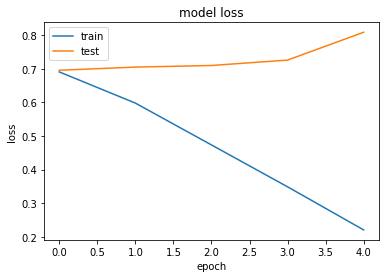

128/128 [==============================] - 4s 33ms/step
              precision    recall  f1-score   support

           0       0.45      0.26      0.33        58
           1       0.55      0.74      0.63        70

    accuracy                           0.52       128
   macro avg       0.50      0.50      0.48       128
weighted avg       0.51      0.52      0.49       128



In [0]:
history = model_4.fit([trainDict[key] for key in trainDict.keys()], y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_4.predict([testDict[key] for key in testDict.keys()], batch_size=32, verbose=1)
print(classification_report(y_test, np.rint(y_pred.reshape(y_pred.shape[0]))))

In [0]:
#model 4 different output weights and further reducing the num of hidden layers
lstm_1 = create_lstm(shape=(500,300), hidden_unit=8, output=4)
lstm_2 = create_lstm(shape=(500,300), hidden_unit=16, output=8)
lstm_3 = create_lstm(shape=(500,300), hidden_unit=32, output=16)

combinedInput = concatenate([lstm_1.output, lstm_2.output, lstm_3.output])

x = Dense(8, activation='relu')(combinedInput)
x = Dense(1, activation='sigmoid')(x)

model_4 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input], outputs=x)

model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_25 (Bidirectio (None, 500, 16)           19776     
_________________________________________________________________
flatten_12 (Flatten)         (None, 8000)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 32004     
Total params: 51,780
Trainable params: 51,780
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_26 (Bidirectio (None, 500, 32)           40576     
_________________________________________________________________
flatten_13 (Flatten)         (None, 16000)             0         
__________________________

Train on 458 samples, validate on 51 samples
Epoch 1/5
458/458 [==============================] - 43s 93ms/step - loss: 0.6881 - acc: 0.5590 - val_loss: 0.6936 - val_acc: 0.5098
Epoch 2/5
458/458 [==============================] - 31s 67ms/step - loss: 0.6292 - acc: 0.6114 - val_loss: 0.6939 - val_acc: 0.5098
Epoch 3/5
458/458 [==============================] - 31s 67ms/step - loss: 0.5118 - acc: 0.8537 - val_loss: 0.7140 - val_acc: 0.5490
Epoch 4/5
458/458 [==============================] - 31s 67ms/step - loss: 0.3321 - acc: 0.9476 - val_loss: 0.7379 - val_acc: 0.5098
Epoch 5/5
458/458 [==============================] - 31s 67ms/step - loss: 0.1684 - acc: 0.9934 - val_loss: 0.7430 - val_acc: 0.5490
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


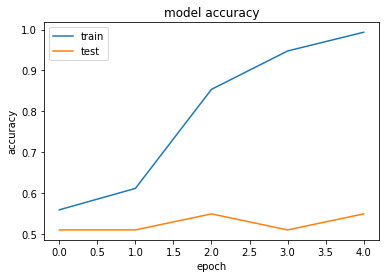

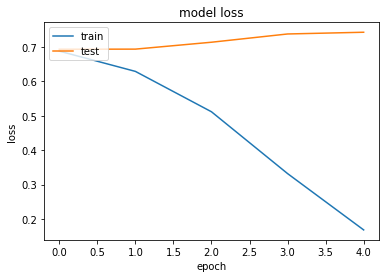

128/128 [==============================] - 5s 38ms/step
              precision    recall  f1-score   support

           0       0.45      0.31      0.37        58
           1       0.55      0.69      0.61        70

    accuracy                           0.52       128
   macro avg       0.50      0.50      0.49       128
weighted avg       0.50      0.52      0.50       128



In [0]:
history = model_4.fit([trainDict[key] for key in trainDict.keys()], y_train, batch_size=16, epochs=5, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_4.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(y_test, np.rint(y_pred.reshape(y_pred.shape[0]))))

In [0]:
#model 5 data preprocessing
X_train = np.load(DATA_PATH + "/SIF_formatted_for_sequence_model_all_time.npy", allow_pickle=True)
y_train = np.load(DATA_PATH + "/sequence_model_y_formatted_all_time.npy", allow_pickle=True)

#get 5 days of data
data = create_multiday(X_train, y_train, num_days=5)
trainDict, testDict = train_test_split_sqs(data, ratio=0.05)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

In [0]:
#model 5: bi-LSTM feed into LSTM with reduced parameters this looks pretty good
lstm_1 = create_lstm(shape=(500,300), hidden_unit=8, output=4)
lstm_2 = create_lstm(shape=(500,300), hidden_unit=8, output=4)
lstm_3 = create_lstm(shape=(500,300), hidden_unit=12, output=4)
lstm_4 = create_lstm(shape=(500,300), hidden_unit=16, output=4)
lstm_5 = create_lstm(shape=(500,300), hidden_unit=16, output=4)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(3, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_5 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input], outputs=x)

model_5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_33 (Bidirectio (None, 500, 16)           19776     
_________________________________________________________________
flatten_20 (Flatten)         (None, 8000)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 32004     
Total params: 51,780
Trainable params: 51,780
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_34 (Bidirectio (None, 500, 16)           19776     
_________________________________________________________________
flatten_21 (Flatten)         (None, 8000)              0         
__________________________

Train on 680 samples, validate on 76 samples
Epoch 1/5
680/680 [==============================] - 90s 132ms/step - loss: 0.7104 - acc: 0.4882 - val_loss: 0.6870 - val_acc: 0.5789
Epoch 2/5
680/680 [==============================] - 70s 103ms/step - loss: 0.6892 - acc: 0.5485 - val_loss: 0.6844 - val_acc: 0.5789
Epoch 3/5
680/680 [==============================] - 70s 104ms/step - loss: 0.6894 - acc: 0.5544 - val_loss: 0.6852 - val_acc: 0.5789
Epoch 4/5
680/680 [==============================] - 70s 102ms/step - loss: 0.6826 - acc: 0.5809 - val_loss: 0.6843 - val_acc: 0.5789
Epoch 5/5
680/680 [==============================] - 72s 107ms/step - loss: 0.6731 - acc: 0.6368 - val_loss: 0.6814 - val_acc: 0.5921
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


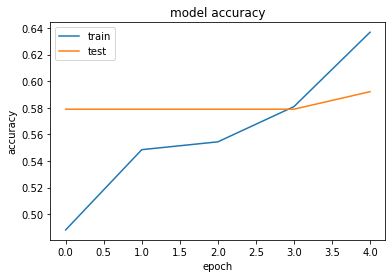

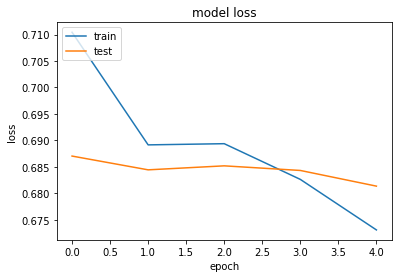

40/40 [==============================] - 6s 150ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.62      1.00      0.77        25

    accuracy                           0.62        40
   macro avg       0.31      0.50      0.38        40
weighted avg       0.39      0.62      0.48        40



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
history = model_5.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=5, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_5.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

In [0]:
#try model 5 on BERT embedding
#get 5 days of data
data = create_multiday(X_train, y_train, num_days=5)
trainDict, testDict = train_test_split_sqs(data, ratio=0.05)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

In [0]:
lstm_1 = create_lstm(hidden_unit=16, output=16)
lstm_2 = create_lstm(hidden_unit=32, output=16)
lstm_3 = create_lstm(hidden_unit=32, output=16)
lstm_4 = create_lstm(hidden_unit=64, output=16)
lstm_5 = create_lstm(hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(5, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_5 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input], outputs=x)

model_5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_48 (Bidirectio (None, 500, 32)           100480    
_________________________________________________________________
flatten_35 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_71 (Dense)             (None, 16)                256016    
Total params: 356,496
Trainable params: 356,496
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_49 (Bidirectio (None, 500, 64)           205056    
_________________________________________________________________
flatten_36 (Flatten)         (None, 32000)             0         
________________________

Train on 424 samples, validate on 48 samples
Epoch 1/30
424/424 [==============================] - 105s 246ms/step - loss: 0.7113 - acc: 0.5519 - val_loss: 0.6974 - val_acc: 0.5625
Epoch 2/30
424/424 [==============================] - 77s 182ms/step - loss: 0.6971 - acc: 0.5590 - val_loss: 0.6893 - val_acc: 0.5625
Epoch 3/30
424/424 [==============================] - 77s 182ms/step - loss: 0.6901 - acc: 0.5590 - val_loss: 0.6867 - val_acc: 0.5625
Epoch 4/30
424/424 [==============================] - 77s 183ms/step - loss: 0.6887 - acc: 0.5566 - val_loss: 0.6855 - val_acc: 0.5625
Epoch 5/30
424/424 [==============================] - 78s 185ms/step - loss: 0.6876 - acc: 0.5637 - val_loss: 0.6854 - val_acc: 0.5625
Epoch 6/30
424/424 [==============================] - 78s 184ms/step - loss: 0.6842 - acc: 0.5590 - val_loss: 0.6853 - val_acc: 0.5625
Epoch 7/30
424/424 [==============================] - 78s 183ms/step - loss: 0.6875 - acc: 0.5637 - val_loss: 0.6853 - val_acc: 0.5625
Epoch 8/3

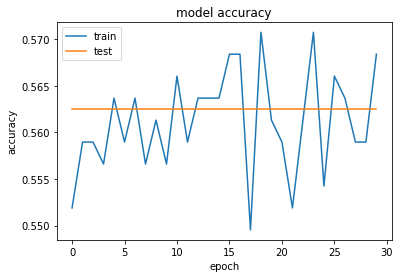

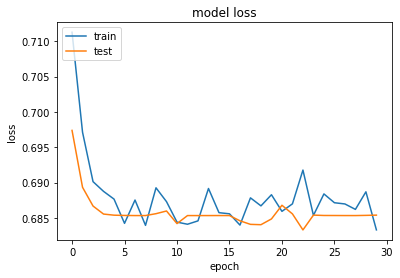

25/25 [==============================] - 9s 359ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.64      1.00      0.78        16

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
history = model_5.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=30, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_5.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

In [0]:
#try model 5 on USE embedding
#get 5 days of data
data = create_multiday(X_train, y_train, num_days=5)
trainDict, testDict = train_test_split_sqs(data, ratio=0.05)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

In [0]:
lstm_1 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_2 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_3 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_4 = create_lstm(shape=(500,512), hidden_unit=64, output=16)
lstm_5 = create_lstm(shape=(500,512), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(5, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_5 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input], outputs=x)

model_5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_58 (Bidirectio (None, 500, 32)           67712     
_________________________________________________________________
flatten_45 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_83 (Dense)             (None, 16)                256016    
Total params: 323,728
Trainable params: 323,728
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_59 (Bidirectio (None, 500, 64)           139520    
_________________________________________________________________
flatten_46 (Flatten)         (None, 32000)             0         
________________________

Train on 680 samples, validate on 76 samples
Epoch 1/30
680/680 [==============================] - 142s 209ms/step - loss: 0.6922 - acc: 0.5529 - val_loss: 0.6809 - val_acc: 0.5789
Epoch 2/30
680/680 [==============================] - 109s 160ms/step - loss: 0.6870 - acc: 0.5500 - val_loss: 0.6821 - val_acc: 0.5789
Epoch 3/30
680/680 [==============================] - 109s 161ms/step - loss: 0.6918 - acc: 0.5426 - val_loss: 0.6820 - val_acc: 0.5789
Epoch 4/30
680/680 [==============================] - 109s 160ms/step - loss: 0.6867 - acc: 0.5368 - val_loss: 0.6821 - val_acc: 0.5789
Epoch 5/30
680/680 [==============================] - 108s 159ms/step - loss: 0.6888 - acc: 0.5500 - val_loss: 0.6818 - val_acc: 0.5789
Epoch 6/30
680/680 [==============================] - 108s 158ms/step - loss: 0.6875 - acc: 0.5603 - val_loss: 0.6820 - val_acc: 0.5789
Epoch 7/30
680/680 [==============================] - 107s 157ms/step - loss: 0.6896 - acc: 0.5426 - val_loss: 0.6817 - val_acc: 0.5789
Epo

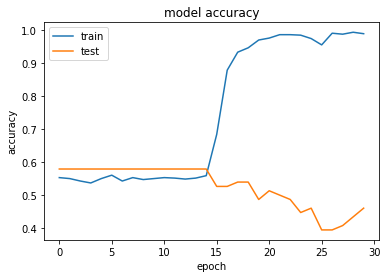

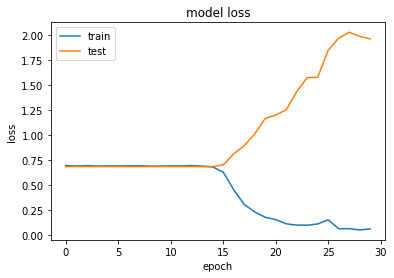

40/40 [==============================] - 10s 258ms/step
              precision    recall  f1-score   support

           0       0.33      0.53      0.41        15
           1       0.56      0.36      0.44        25

    accuracy                           0.42        40
   macro avg       0.45      0.45      0.42        40
weighted avg       0.48      0.42      0.43        40



In [0]:
history = model_5.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=30, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_5.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_63 (Bidirectio (None, 500, 32)           67712     
_________________________________________________________________
flatten_50 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_89 (Dense)             (None, 16)                256016    
Total params: 323,728
Trainable params: 323,728
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_64 (Bidirectio (None, 500, 64)           139520    
_________________________________________________________________
flatten_51 (Flatten)         (None, 32000)             0         
________________________

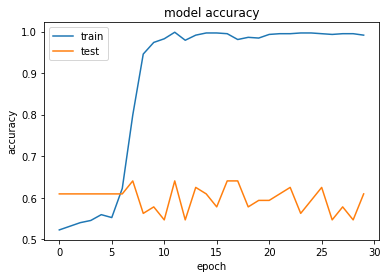

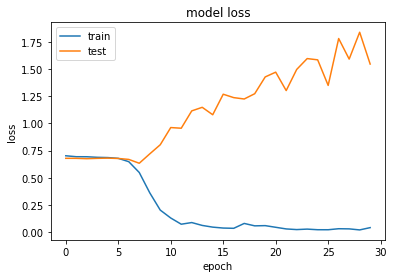

160/160 [==============================] - 15s 94ms/step
              precision    recall  f1-score   support

           0       0.43      0.40      0.41        65
           1       0.61      0.63      0.62        95

    accuracy                           0.54       160
   macro avg       0.52      0.52      0.52       160
weighted avg       0.53      0.54      0.53       160



In [0]:
#try model 5 on USE embedding good enough results!
#get 5 days of data
data = create_multiday(X_train, y_train, num_days=5)
trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

lstm_1 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_2 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_3 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_4 = create_lstm(shape=(500,512), hidden_unit=64, output=16)
lstm_5 = create_lstm(shape=(500,512), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(5, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_5 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input], outputs=x)

model_5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_5.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=30, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_5.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 500, 32)           67712     
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
Total params: 323,728
Trainable params: 323,728
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 500, 32)           67712     
_______________________________________

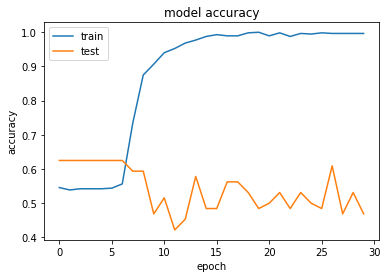

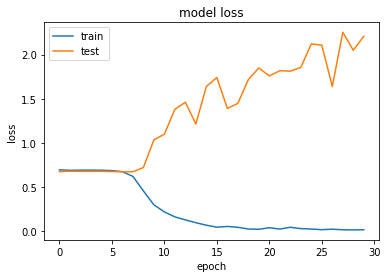

159/159 [==============================] - 13s 79ms/step
              precision    recall  f1-score   support

           0       0.43      0.72      0.54        65
           1       0.64      0.34      0.44        94

    accuracy                           0.50       159
   macro avg       0.54      0.53      0.49       159
weighted avg       0.55      0.50      0.48       159



In [0]:
#model 6 on USE embedding good enough results!
#get 10 days of data
data = create_multiday(X_train, y_train, num_days=10)
trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

lstm_1 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_2 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_3 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_4 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_5 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_6 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_7 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_8 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_9 = create_lstm(shape=(500,512), hidden_unit=64, output=16)
lstm_10 = create_lstm(shape=(500,512), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_6.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=30, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_6.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Train on 568 samples, validate on 64 samples
Epoch 1/6
568/568 [==============================] - 693s 1s/step - loss: 0.6897 - acc: 0.5511 - val_loss: 0.6751 - val_acc: 0.6250
Epoch 2/6
568/568 [==============================] - 667s 1s/step - loss: 0.6906 - acc: 0.5335 - val_loss: 0.6758 - val_acc: 0.6250
Epoch 3/6
568/568 [==============================] - 665s 1s/step - loss: 0.6914 - acc: 0.5158 - val_loss: 0.6780 - val_acc: 0.6250
Epoch 4/6
568/568 [==============================] - 660s 1s/step - loss: 0.6901 - acc: 0.5229 - val_loss: 0.6723 - val_acc: 0.6250
Epoch 5/6
568/568 [==============================] - 662s 1s/step - loss: 0.6810 - acc: 0.5599 - val_loss: 0.6835 - val_acc: 0.5625
Epoch 6/6
568/568 [==============================] - 649s 1s/step - loss: 0.6730 - acc: 0.5986 - val_loss: 0.6777 - val_acc: 0.6250
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


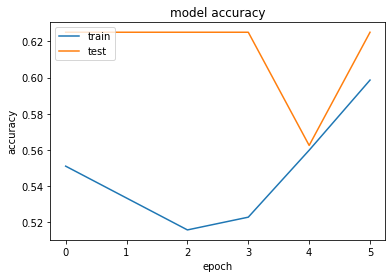

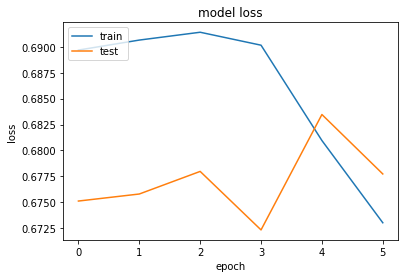

159/159 [==============================] - 78s 492ms/step
              precision    recall  f1-score   support

           0       0.43      0.28      0.34        65
           1       0.60      0.74      0.66        94

    accuracy                           0.55       159
   macro avg       0.51      0.51      0.50       159
weighted avg       0.53      0.55      0.53       159



In [0]:
#model 6 on USE embedding good enough results!
#get 10 days of data

lstm_1 = create_lstm(shape=(500,300), hidden_unit=16, output=16)
lstm_2 = create_lstm(shape=(500,300), hidden_unit=16, output=16)
lstm_3 = create_lstm(shape=(500,300), hidden_unit=16, output=16)
lstm_4 = create_lstm(shape=(500,300), hidden_unit=16, output=16)
lstm_5 = create_lstm(shape=(500,300), hidden_unit=32, output=16)
lstm_6 = create_lstm(shape=(500,300), hidden_unit=32, output=16)
lstm_7 = create_lstm(shape=(500,300), hidden_unit=32, output=16)
lstm_8 = create_lstm(shape=(500,300), hidden_unit=32, output=16)
lstm_9 = create_lstm(shape=(500,300), hidden_unit=64, output=16)
lstm_10 = create_lstm(shape=(500,300), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_6.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=6, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_6.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Train on 568 samples, validate on 64 samples
Epoch 1/8
568/568 [==============================] - 664s 1s/step - loss: 0.6965 - acc: 0.5053 - val_loss: 0.6771 - val_acc: 0.6250
Epoch 2/8
568/568 [==============================] - 630s 1s/step - loss: 0.6909 - acc: 0.5475 - val_loss: 0.6760 - val_acc: 0.6250
Epoch 3/8
568/568 [==============================] - 632s 1s/step - loss: 0.6860 - acc: 0.5423 - val_loss: 0.6757 - val_acc: 0.6250
Epoch 4/8
568/568 [==============================] - 623s 1s/step - loss: 0.6916 - acc: 0.5158 - val_loss: 0.6795 - val_acc: 0.6250
Epoch 5/8
568/568 [==============================] - 627s 1s/step - loss: 0.6850 - acc: 0.5651 - val_loss: 0.6948 - val_acc: 0.5469
Epoch 6/8
568/568 [==============================] - 639s 1s/step - loss: 0.6836 - acc: 0.5616 - val_loss: 0.6815 - val_acc: 0.6250
Epoch 7/8
568/568 [==============================] - 621s 1s/step - loss: 0.6792 - acc: 0.5634 - val_loss: 0.7163 - val_acc: 0.4375
Epoch 8/8
568/568 [============

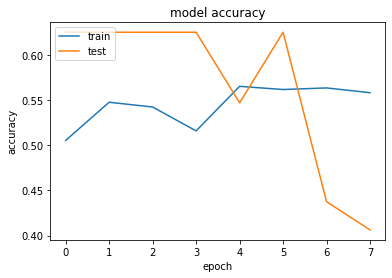

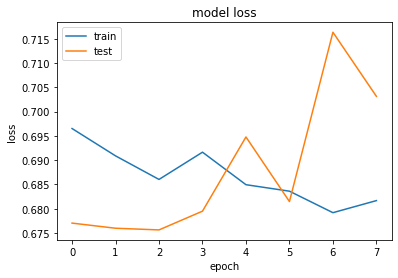

159/159 [==============================] - 77s 483ms/step
              precision    recall  f1-score   support

           0       0.49      0.43      0.46        65
           1       0.64      0.69      0.66        94

    accuracy                           0.58       159
   macro avg       0.56      0.56      0.56       159
weighted avg       0.58      0.58      0.58       159



In [0]:
#model 6 on USE embedding good enough results!
#get 10 days of data
#data = create_multiday(X_train, y_train, num_days=10)
#trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

#yTrain = trainDict['y_train']
#del trainDict['y_train']

#yTest = testDict['y_train']
#del testDict['y_train']

lstm_1 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_2 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_3 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_4 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_5 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_6 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_7 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_8 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_9 = create_lstm(shape=(500,512), hidden_unit=64, output=16)
lstm_10 = create_lstm(shape=(500,512), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_6.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=8, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_6.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Train on 568 samples, validate on 64 samples
Epoch 1/8
568/568 [==============================] - 766s 1s/step - loss: 24.8673 - acc: 0.5141 - val_loss: 14.3784 - val_acc: 0.6250
Epoch 2/8
568/568 [==============================] - 739s 1s/step - loss: 9.2816 - acc: 0.4894 - val_loss: 5.3434 - val_acc: 0.6250
Epoch 3/8
568/568 [==============================] - 734s 1s/step - loss: 3.6209 - acc: 0.5211 - val_loss: 2.3064 - val_acc: 0.6250
Epoch 4/8
568/568 [==============================] - 736s 1s/step - loss: 1.7660 - acc: 0.5335 - val_loss: 1.3316 - val_acc: 0.6250
Epoch 5/8
568/568 [==============================] - 743s 1s/step - loss: 1.1597 - acc: 0.5370 - val_loss: 0.9998 - val_acc: 0.6250
Epoch 6/8
568/568 [==============================] - 743s 1s/step - loss: 0.9377 - acc: 0.5282 - val_loss: 0.8603 - val_acc: 0.6250
Epoch 7/8
568/568 [==============================] - 747s 1s/step - loss: 0.8385 - acc: 0.5511 - val_loss: 0.7888 - val_acc: 0.6250
Epoch 8/8
568/568 [==========

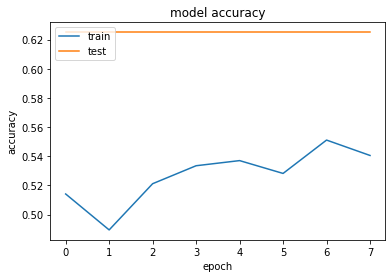

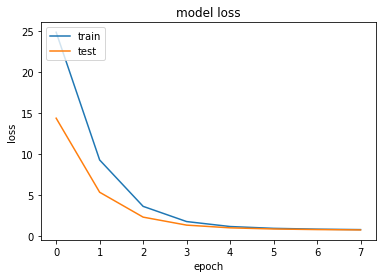

159/159 [==============================] - 80s 504ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.59      1.00      0.74        94

    accuracy                           0.59       159
   macro avg       0.30      0.50      0.37       159
weighted avg       0.35      0.59      0.44       159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#model 6 on SIF embedding good enough results!
#get 10 days of data
data = create_multiday(X_train, y_train, num_days=10)
trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

lstm_1 = create_lstm(shape=(500,300), hidden_unit=16, output=16)
lstm_2 = create_lstm(shape=(500,300), hidden_unit=16, output=16)
lstm_3 = create_lstm(shape=(500,300), hidden_unit=16, output=16)
lstm_4 = create_lstm(shape=(500,300), hidden_unit=16, output=16)
lstm_5 = create_lstm(shape=(500,300), hidden_unit=32, output=16)
lstm_6 = create_lstm(shape=(500,300), hidden_unit=32, output=16)
lstm_7 = create_lstm(shape=(500,300), hidden_unit=32, output=16)
lstm_8 = create_lstm(shape=(500,300), hidden_unit=32, output=16)
lstm_9 = create_lstm(shape=(500,300), hidden_unit=64, output=16)
lstm_10 = create_lstm(shape=(500,300), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_6.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=8, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_6.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_11 (Bidirectio (None, 500, 32)           67712     
_________________________________________________________________
flatten_11 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                256016    
Total params: 323,728
Trainable params: 323,728
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_12 (Bidirectio (None, 500, 32)           67712     
_________________________________________________________________
flatten_12 (Flatten)         (None, 16000)             0         
________________________

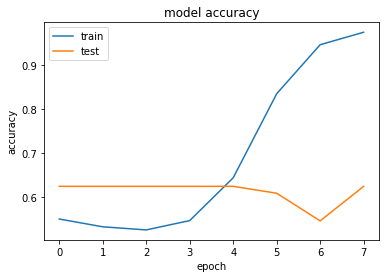

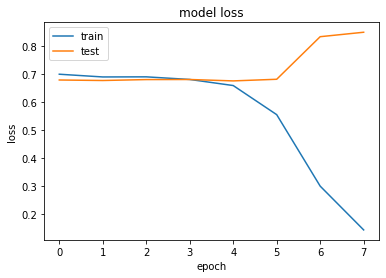

159/159 [==============================] - 14s 85ms/step
              precision    recall  f1-score   support

           0       0.49      0.35      0.41        65
           1       0.62      0.74      0.68        94

    accuracy                           0.58       159
   macro avg       0.56      0.55      0.55       159
weighted avg       0.57      0.58      0.57       159



In [0]:
#model 6 on USE embedding good enough results! Use early stopping
#get 10 days of data
data = create_multiday(X_train, y_train, num_days=10)
trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

lstm_1 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_2 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_3 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_4 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_5 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_6 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_7 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_8 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_9 = create_lstm(shape=(500,512), hidden_unit=64, output=16)
lstm_10 = create_lstm(shape=(500,512), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_6.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=15, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_6.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_21 (Bidirectio (None, 500, 32)           67712     
_________________________________________________________________
flatten_21 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                256016    
Total params: 323,728
Trainable params: 323,728
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_22 (Bidirectio (None, 500, 32)           67712     
_________________________________________________________________
flatten_22 (Flatten)         (None, 16000)             0         
________________________

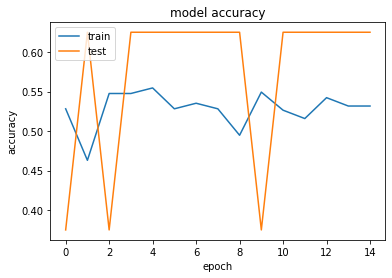

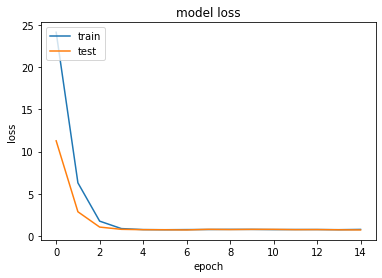

159/159 [==============================] - 15s 93ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.59      1.00      0.74        94

    accuracy                           0.59       159
   macro avg       0.30      0.50      0.37       159
weighted avg       0.35      0.59      0.44       159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#add regularization
lstm_1 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_2 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_3 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_4 = create_lstm(shape=(500,512), hidden_unit=16, output=16)
lstm_5 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_6 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_7 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_8 = create_lstm(shape=(500,512), hidden_unit=32, output=16)
lstm_9 = create_lstm(shape=(500,512), hidden_unit=64, output=16)
lstm_10 = create_lstm(shape=(500,512), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_6.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=15, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_6.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 500, 32)           50784     
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
Total params: 306,800
Trainable params: 306,800
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 500, 32)           50784     
_______________________________________

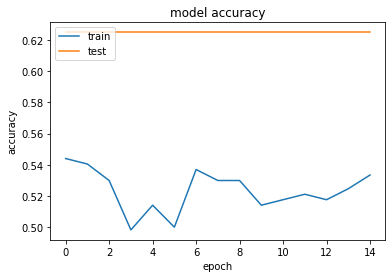

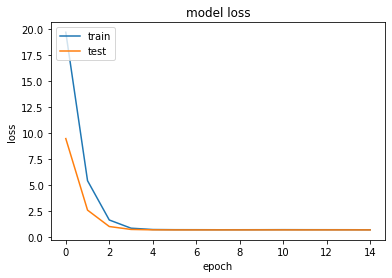

159/159 [==============================] - 62s 392ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.59      1.00      0.74        94

    accuracy                           0.59       159
   macro avg       0.30      0.50      0.37       159
weighted avg       0.35      0.59      0.44       159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#model 7 on USE embedding : test GRU models
#get 10 days of data
data = create_multiday(X_train, y_train, num_days=10)
trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

lstm_1 = create_gru(shape=(500,512), hidden_unit=16, output=16)
lstm_2 = create_gru(shape=(500,512), hidden_unit=16, output=16)
lstm_3 = create_gru(shape=(500,512), hidden_unit=16, output=16)
lstm_4 = create_gru(shape=(500,512), hidden_unit=16, output=16)
lstm_5 = create_gru(shape=(500,512), hidden_unit=32, output=16)
lstm_6 = create_gru(shape=(500,512), hidden_unit=32, output=16)
lstm_7 = create_gru(shape=(500,512), hidden_unit=32, output=16)
lstm_8 = create_gru(shape=(500,512), hidden_unit=32, output=16)
lstm_9 = create_gru(shape=(500,512), hidden_unit=64, output=16)
lstm_10 = create_gru(shape=(500,512), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = GRU(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_6.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=15, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_6.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 496, 64)           163904    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 124, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
Total params: 169,360
Trainable params: 169,360
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 496, 64)           163904    
__________________________

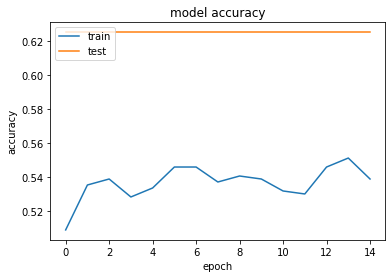

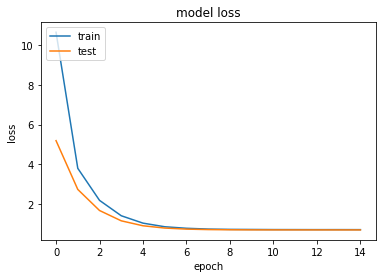

159/159 [==============================] - 12s 75ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.59      1.00      0.74        94

    accuracy                           0.59       159
   macro avg       0.30      0.50      0.37       159
weighted avg       0.35      0.59      0.44       159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#model 8 on USE embedding : test cnnLSTM models
#get 10 days of data
data = create_multiday(X_train, y_train, num_days=10)
trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

lstm_1 = create_cnnLSTM(shape=(500,512), hidden_unit=16, output=16)
lstm_2 = create_cnnLSTM(shape=(500,512), hidden_unit=16, output=16)
lstm_3 = create_cnnLSTM(shape=(500,512), hidden_unit=16, output=16)
lstm_4 = create_cnnLSTM(shape=(500,512), hidden_unit=16, output=16)
lstm_5 = create_cnnLSTM(shape=(500,512), hidden_unit=32, output=16)
lstm_6 = create_cnnLSTM(shape=(500,512), hidden_unit=32, output=16)
lstm_7 = create_cnnLSTM(shape=(500,512), hidden_unit=32, output=16)
lstm_8 = create_cnnLSTM(shape=(500,512), hidden_unit=32, output=16)
lstm_9 = create_cnnLSTM(shape=(500,512), hidden_unit=64, output=16)
lstm_10 = create_cnnLSTM(shape=(500,512), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_8 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_8.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_8.summary()
history = model_8.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=15, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_8.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_1_input (InputLayer)     (None, 500, 768)     0                                            
__________________________________________________________________________________________________
conv1d_2_input (InputLayer)     (None, 500, 768)     0                                            
__________________________________________________________________________________________________
conv1d_3_input (InputLayer)     (None, 500, 768)     0                                            
__________________________________________________________________________

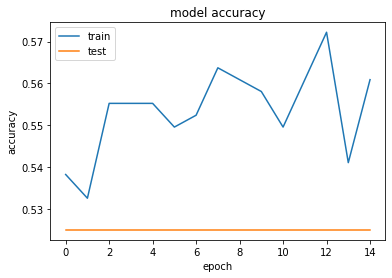

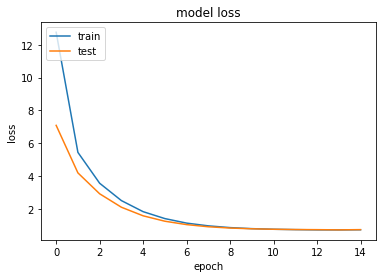

99/99 [==============================] - 9s 92ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.60      1.00      0.75        59

    accuracy                           0.60        99
   macro avg       0.30      0.50      0.37        99
weighted avg       0.36      0.60      0.45        99



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#model 8 on BERT embedding : test cnnLSTM models
#get 10 days of data
data = create_multiday(X_train, y_train, num_days=10)
trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

lstm_1 = create_cnnLSTM(hidden_unit=16, output=16)
lstm_2 = create_cnnLSTM(hidden_unit=16, output=16)
lstm_3 = create_cnnLSTM(hidden_unit=16, output=16)
lstm_4 = create_cnnLSTM(hidden_unit=16, output=16)
lstm_5 = create_cnnLSTM(hidden_unit=32, output=16)
lstm_6 = create_cnnLSTM(hidden_unit=32, output=16)
lstm_7 = create_cnnLSTM(hidden_unit=32, output=16)
lstm_8 = create_cnnLSTM(hidden_unit=32, output=16)
lstm_9 = create_cnnLSTM(hidden_unit=64, output=16)
lstm_10 = create_cnnLSTM(hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_8 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_8.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_8.summary()
history = model_8.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=15, verbose=1, validation_split=0.1, shuffle=False)
plot_learning_curve(history)

y_pred = model_8.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_11_input (InputLayer)    (None, 500, 300)     0                                            
__________________________________________________________________________________________________
conv1d_12_input (InputLayer)    (None, 500, 300)     0                                            
__________________________________________________________________________________________________
conv1d_13_input (InputLayer)    (None, 500, 300)     0                                            
__________________________________________________________________________________________________
conv1d_14_input (InputLayer)    (None, 500, 300)     0                                            
____________________________________________________________________________________________

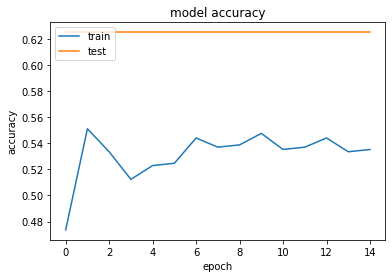

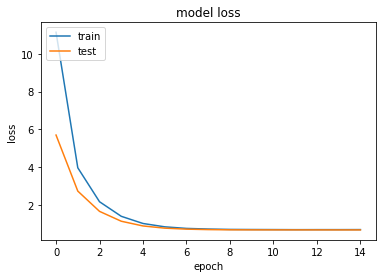

159/159 [==============================] - 12s 75ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.59      1.00      0.74        94

    accuracy                           0.59       159
   macro avg       0.30      0.50      0.37       159
weighted avg       0.35      0.59      0.44       159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#model 8 on BERT embedding : test cnnLSTM models
#get 10 days of data
data = create_multiday(X_train, y_train, num_days=10)
trainDict, testDict = train_test_split_sqs(data, ratio=0.2)

yTrain = trainDict['y_train']
del trainDict['y_train']

yTest = testDict['y_train']
del testDict['y_train']

lstm_1 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16)
lstm_2 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16)
lstm_3 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16)
lstm_4 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16)
lstm_5 = create_cnnLSTM(shape=(500,300), hidden_unit=32, output=16)
lstm_6 = create_cnnLSTM(shape=(500,300), hidden_unit=32, output=16)
lstm_7 = create_cnnLSTM(shape=(500,300), hidden_unit=32, output=16)
lstm_8 = create_cnnLSTM(shape=(500,300), hidden_unit=32, output=16)
lstm_9 = create_cnnLSTM(shape=(500,300), hidden_unit=64, output=16)
lstm_10 = create_cnnLSTM(shape=(500,300), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_8 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_8.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_8.summary()
history = model_8.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=15, verbose=1, validation_split=0.1)
plot_learning_curve(history)

y_pred = model_8.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_21_input (InputLayer)    (None, 500, 300)     0                                            
__________________________________________________________________________________________________
conv1d_22_input (InputLayer)    (None, 500, 300)     0                                            
__________________________________________________________________________________________________
conv1d_23_input (InputLayer)    (None, 500, 300)     0                                            
__________________________________________________________________________________________________
conv1d_24_input (InputLayer)    (None, 500, 300)     0                                            
____________________________________________________________________________________________

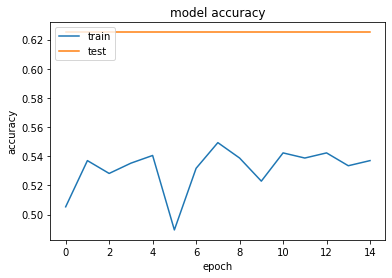

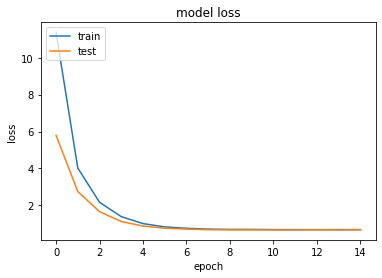

159/159 [==============================] - 13s 79ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.59      1.00      0.74        94

    accuracy                           0.59       159
   macro avg       0.30      0.50      0.37       159
weighted avg       0.35      0.59      0.44       159



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#enable shuffle
lstm_1 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16)
lstm_2 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16)
lstm_3 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16)
lstm_4 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16)
lstm_5 = create_cnnLSTM(shape=(500,300), hidden_unit=32, output=16)
lstm_6 = create_cnnLSTM(shape=(500,300), hidden_unit=32, output=16)
lstm_7 = create_cnnLSTM(shape=(500,300), hidden_unit=32, output=16)
lstm_8 = create_cnnLSTM(shape=(500,300), hidden_unit=32, output=16)
lstm_9 = create_cnnLSTM(shape=(500,300), hidden_unit=64, output=16)
lstm_10 = create_cnnLSTM(shape=(500,300), hidden_unit=64, output=16)

output_list = [lstm_1.output, lstm_2.output, lstm_3.output, lstm_4.output, lstm_5.output, lstm_6.output, lstm_7.output, lstm_8.output, lstm_9.output, lstm_10.output]
sequenceInput = Lambda(lambda x: stack(x, axis=1))(output_list)

x = LSTM(10, dropout=0.2)(sequenceInput)
x = Dense(1, activation='sigmoid')(x)

model_8 = Model(inputs=[lstm_1.input, lstm_2.input, lstm_3.input, lstm_4.input, lstm_5.input, lstm_6.input, lstm_7.input, lstm_8.input, lstm_9.input, lstm_10.input], outputs=x)

model_8.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_8.summary()
history = model_8.fit([trainDict[key] for key in trainDict.keys()], yTrain, batch_size=16, epochs=15, verbose=1, validation_split=0.1)
plot_learning_curve(history)

y_pred = model_8.predict([testDict[key] for key in testDict.keys()], batch_size=16, verbose=1)
print(classification_report(yTest, np.rint(y_pred.reshape(y_pred.shape[0]))))

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_35 (Conv1D)           (None, 496, 64)           96064     
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 124, 64)           0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dense_39 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 17        
Total params: 101,537
Trainable params: 101,537
Non-trainable params: 0
_________________________________________________________________
Train on 720 samples, validate on 81 samples
Epoch 1/30
720/720 [==============================] - 20s 28ms/step 

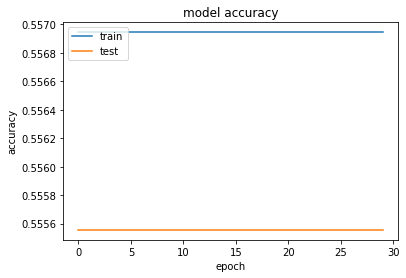

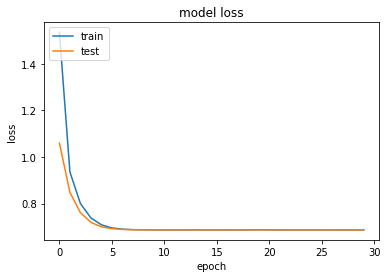

In [0]:
#only using one layer of cnnLSTM model: SIF data
model_9 = create_cnnLSTM(shape=(500,300), hidden_unit=16, output=16, regress=True)
model_9.summary()
model_9.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model_9.fit(X_train, y_train, batch_size=16, epochs=30, verbose=1, validation_split=0.1)
plot_learning_curve(history)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 496, 64)           245824    
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 124, 64)           0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dense_41 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 17        
Total params: 251,297
Trainable params: 251,297
Non-trainable params: 0
_________________________________________________________________
Train on 451 samples, validate on 51 samples
Epoch 1/30
451/451 [==============================] - 17s 37ms/step 

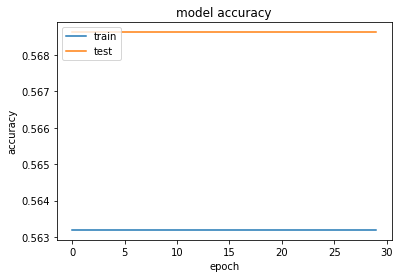

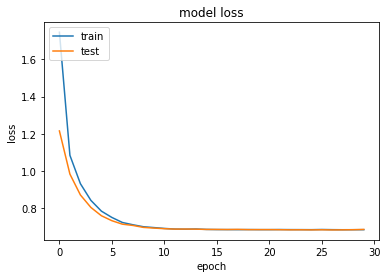

In [0]:
#only using one layer of cnnLSTM model: BERT data
model_9 = create_cnnLSTM(hidden_unit=16, output=16, regress=True)
model_9.summary()
model_9.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model_9.fit(X_train, y_train, batch_size=16, epochs=30, verbose=1, validation_split=0.1)
plot_learning_curve(history)

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 496, 64)           163904    
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 124, 64)           0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dense_45 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 17        
Total params: 169,377
Trainable params: 169,377
Non-trainable params: 0
_________________________________________________________________
Train on 720 samples, validate on 81 samples
Epoch 1/30
720/720 [==============================] - 22s 30ms/step 

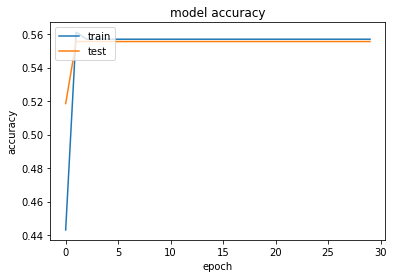

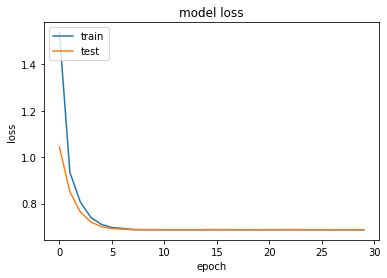

In [0]:
#only using one layer of cnnLSTM model: USE data
model_9 = create_cnnLSTM(shape=(500,512), hidden_unit=16, output=16, regress=True)
model_9.summary()
model_9.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model_9.fit(X_train, y_train, batch_size=16, epochs=30, verbose=1, validation_split=0.1)
plot_learning_curve(history)